# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> ** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 **. Sau đó được tuyên bố là ** Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [137]:

!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly



In [138]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [101]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [102]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

## Hãy xem dữ liệu tổng quan:

In [103]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [104]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [105]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

In [ ]:
#Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu:
 'Ngày 22/01/2020'

In [ ]:
#Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
'Ngày 04/08/2021'

In [106]:
#Xác định có bao nhiêu quốc gia trong dữ liệu này.
'201 quốc gia'
print('Số quốc gia trong bảng Cornfirmed:',len(confirmed_df['Country/Region'].unique()))
print('Số quốc gia trong bảng Deaths:',len(deaths_df['Country/Region'].unique()))
print('Số quốc gia trong bảng Recoveries:',len(recoveries_df['Country/Region'].unique()))

Số quốc gia trong bảng Cornfirmed: 201
Số quốc gia trong bảng Deaths: 201
Số quốc gia trong bảng Recoveries: 201


In [107]:
#Tính tổng số ngày có trong 3 bộ dữ liệu Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
print('Số hàng bị trùng lặp trong bảng Confirmed:',len(confirmed_df[confirmed_df.duplicated()]))
print('Số hàng bị trùng lặp trong bảng Deaths:',len(deaths_df[deaths_df.duplicated()]))
print('Số hàng bị trùng lặp trong bảng Recoveries:',len(recoveries_df[recoveries_df.duplicated()]))
cols_1 = confirmed_df.loc[:,'1/22/20':'8/4/21'].keys()
cols_2 = deaths_df.loc[:,'1/22/20':'8/4/21'].keys()
cols_3 = recoveries_df.loc[:,'1/22/20':'8/4/21'].keys()
print('Tổng số ngày trong bảng Confirmed:',len(cols_1))
print('Tổng số ngày trong bảng Deaths:',len(cols_2))
print('Tổng số ngày trong bảng Recoveries:',len(cols_3))


Số hàng bị trùng lặp trong bảng Confirmed: 0
Số hàng bị trùng lặp trong bảng Deaths: 0
Số hàng bị trùng lặp trong bảng Recoveries: 0
Tổng số ngày trong bảng Confirmed: 561
Tổng số ngày trong bảng Deaths: 561
Tổng số ngày trong bảng Recoveries: 561


In [108]:
#Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
a=confirmed_df[confirmed_df['Province/State'].isnull()]
print(len(a['Country/Region'].unique()))
b=deaths_df[deaths_df['Province/State'].isnull()]
print(len(b['Country/Region'].unique()))
c=recoveries_df[recoveries_df['Province/State'].isnull()]
print(len(c['Country/Region'].unique()))

198
198
199


In [110]:
#Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
a=confirmed_df[confirmed_df['Province/State'].notnull()]
print('Bảng Cornfirmed:',len(a['Country/Region'].unique()),a['Country/Region'].unique())
b=deaths_df[deaths_df['Province/State'].notnull()]
print('Bảng Deaths:',len(b['Country/Region'].unique()),b['Country/Region'].unique())
c=recoveries_df[recoveries_df['Province/State'].notnull()]
print('Bảng Recoveries:',len(c['Country/Region'].unique()),c['Country/Region'].unique())

Bảng Cornfirmed: 8 ['Australia' 'Canada' 'China' 'Denmark' 'France' 'Netherlands'
 'New Zealand' 'United Kingdom']
Bảng Deaths: 8 ['Australia' 'Canada' 'China' 'Denmark' 'France' 'Netherlands'
 'New Zealand' 'United Kingdom']
Bảng Recoveries: 7 ['Australia' 'China' 'Denmark' 'France' 'Netherlands' 'New Zealand'
 'United Kingdom']


In [111]:
#Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
a=confirmed_df.groupby('Country/Region').sum().iloc[:,2:]
b=a.copy()
b=b.drop(b.columns[-1],axis=1)
b['New Column'] = 0
# Đổi vị trí cột mới lên đầu tiên
cols = b.columns.tolist()
cols = ['New Column'] + cols[:-1]
b = b[cols]
b.columns = a.columns
#tạo dataframe số ca theo ngày
result=a-b
# Hiển thị kết quả
max_value = result.max().max() 
max_index = result[result == max_value].stack().index[0]
max_column = result.max().idxmax()
print('Quốc gia và ngày mà có số Covid nhiều nhất:',max_index[0],' - ',max_column,' - số ca: ',max_value)

Quốc gia và ngày mà có số Covid nhiều nhất: Turkey  -  12/10/20  - số ca:  823225


In [112]:
#Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
b=deaths_df.groupby('Country/Region').sum()
b=b.iloc[:,-1].idxmax()
print('Quốc gia có tổng số người mất do Covid nhiều nhất:',b)

Quốc gia có tổng số người mất do Covid nhiều nhất: US


In [113]:
#Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.
a=confirmed_df[confirmed_df['Country/Region']== 'Vietnam']
a=a.iloc[:,-1].sum()
b=deaths_df[deaths_df['Country/Region']== 'Vietnam']
b=b.iloc[:,-1].sum()
c=recoveries_df[recoveries_df['Country/Region']== 'Vietnam']
c=c.iloc[:,-1].sum()
print('Tổng số ca Covid đến thời điểm hiện tại ở Việt Nam:',a)
print('Tổng số ca tử vong đến thời điểm hiện tại ở Việt Nam :',b)
print('Tổng số ca phục hồi đến thời điểm hiện tại ở Việt Nam:',c)
print('Tổng số còn lại đến thời điểm hiện tại ở Việt Nam:',a-b-c)

Tổng số ca Covid đến thời điểm hiện tại ở Việt Nam: 181756
Tổng số ca tử vong đến thời điểm hiện tại ở Việt Nam : 2327
Tổng số ca phục hồi đến thời điểm hiện tại ở Việt Nam: 54332
Tổng số còn lại đến thời điểm hiện tại ở Việt Nam: 125097


#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [114]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []  
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập mã lập trình của bạn tại đây:
for i in adjusted_dates:
    a=confirmed.iloc[:,i].sum()
    total_cases.append(a)
    b=deaths.iloc[:,i].sum()
    total_deaths.append(b)
    c=recoveries.iloc[:,i].sum()
    total_recovered.append(c)
    d=a-b-c
    total_active.append(d)

In [115]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

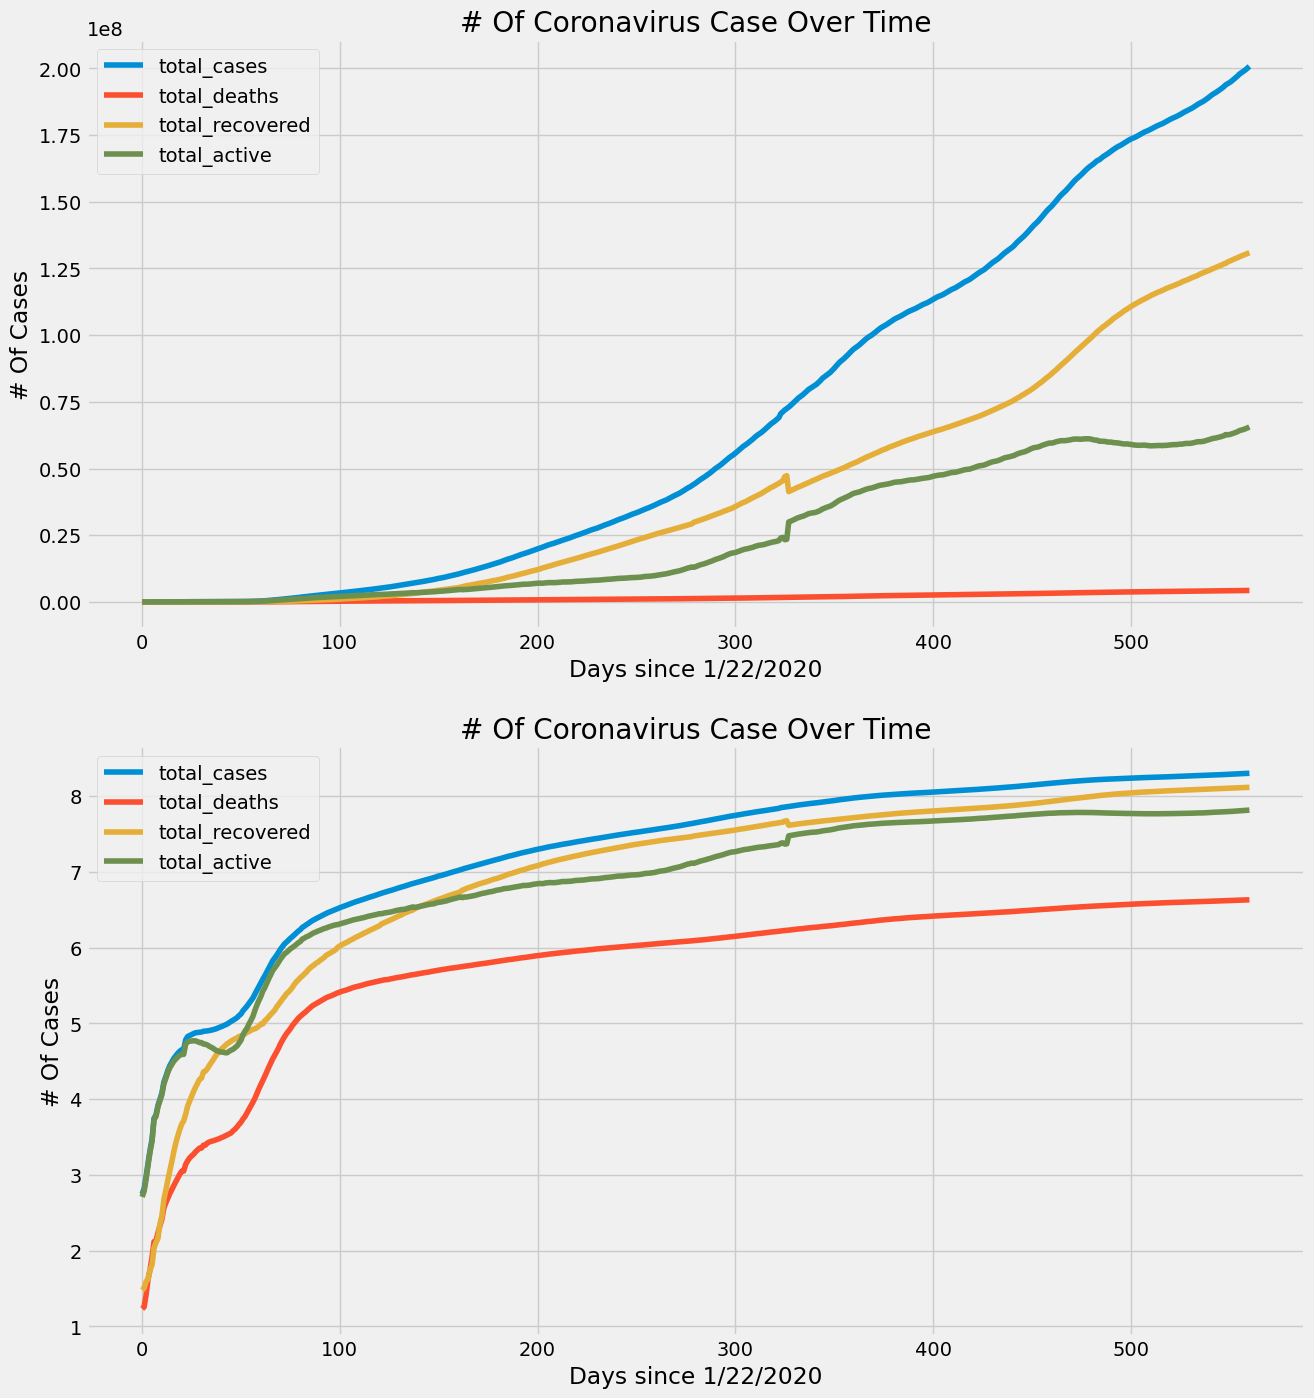

In [116]:
#Nhập mã lập trình của bạn tại đây:
##Thiết lập dữ liệu
df=pd.DataFrame()
df['total_cases']=total_cases
df['total_deaths']=total_deaths
df['total_recovered']=total_recovered
df['total_active']=total_active
df2=df.copy()
df2['total_cases']=np.log10(df2['total_cases'])
df2['total_deaths']=np.log10(df2['total_deaths'])
df2['total_recovered']=np.log10(df2['total_recovered'])
df2['total_active']=np.log10(df2['total_active'])
#Tạo biểu đồ
fig = plt.figure()
ax0 = fig.add_subplot(2, 1, 1) 
ax1 = fig.add_subplot(2, 1, 2)
##Subplot1
df.plot(kind='line', figsize=(14, 16),ax=ax0)
ax0.set_title('# Of Coronavirus Case Over Time')
ax0.set_ylabel('# Of Cases')
ax0.set_xlabel('Days since 1/22/2020')
##subplot2
df2.plot(kind='line', figsize=(14, 16),ax=ax1)
ax1.set_title('# Of Coronavirus Case Over Time')
ax1.set_ylabel('# Of Cases')
ax1.set_xlabel('Days since 1/22/2020')
#Hiển thị biểu đồ
plt.show()

## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

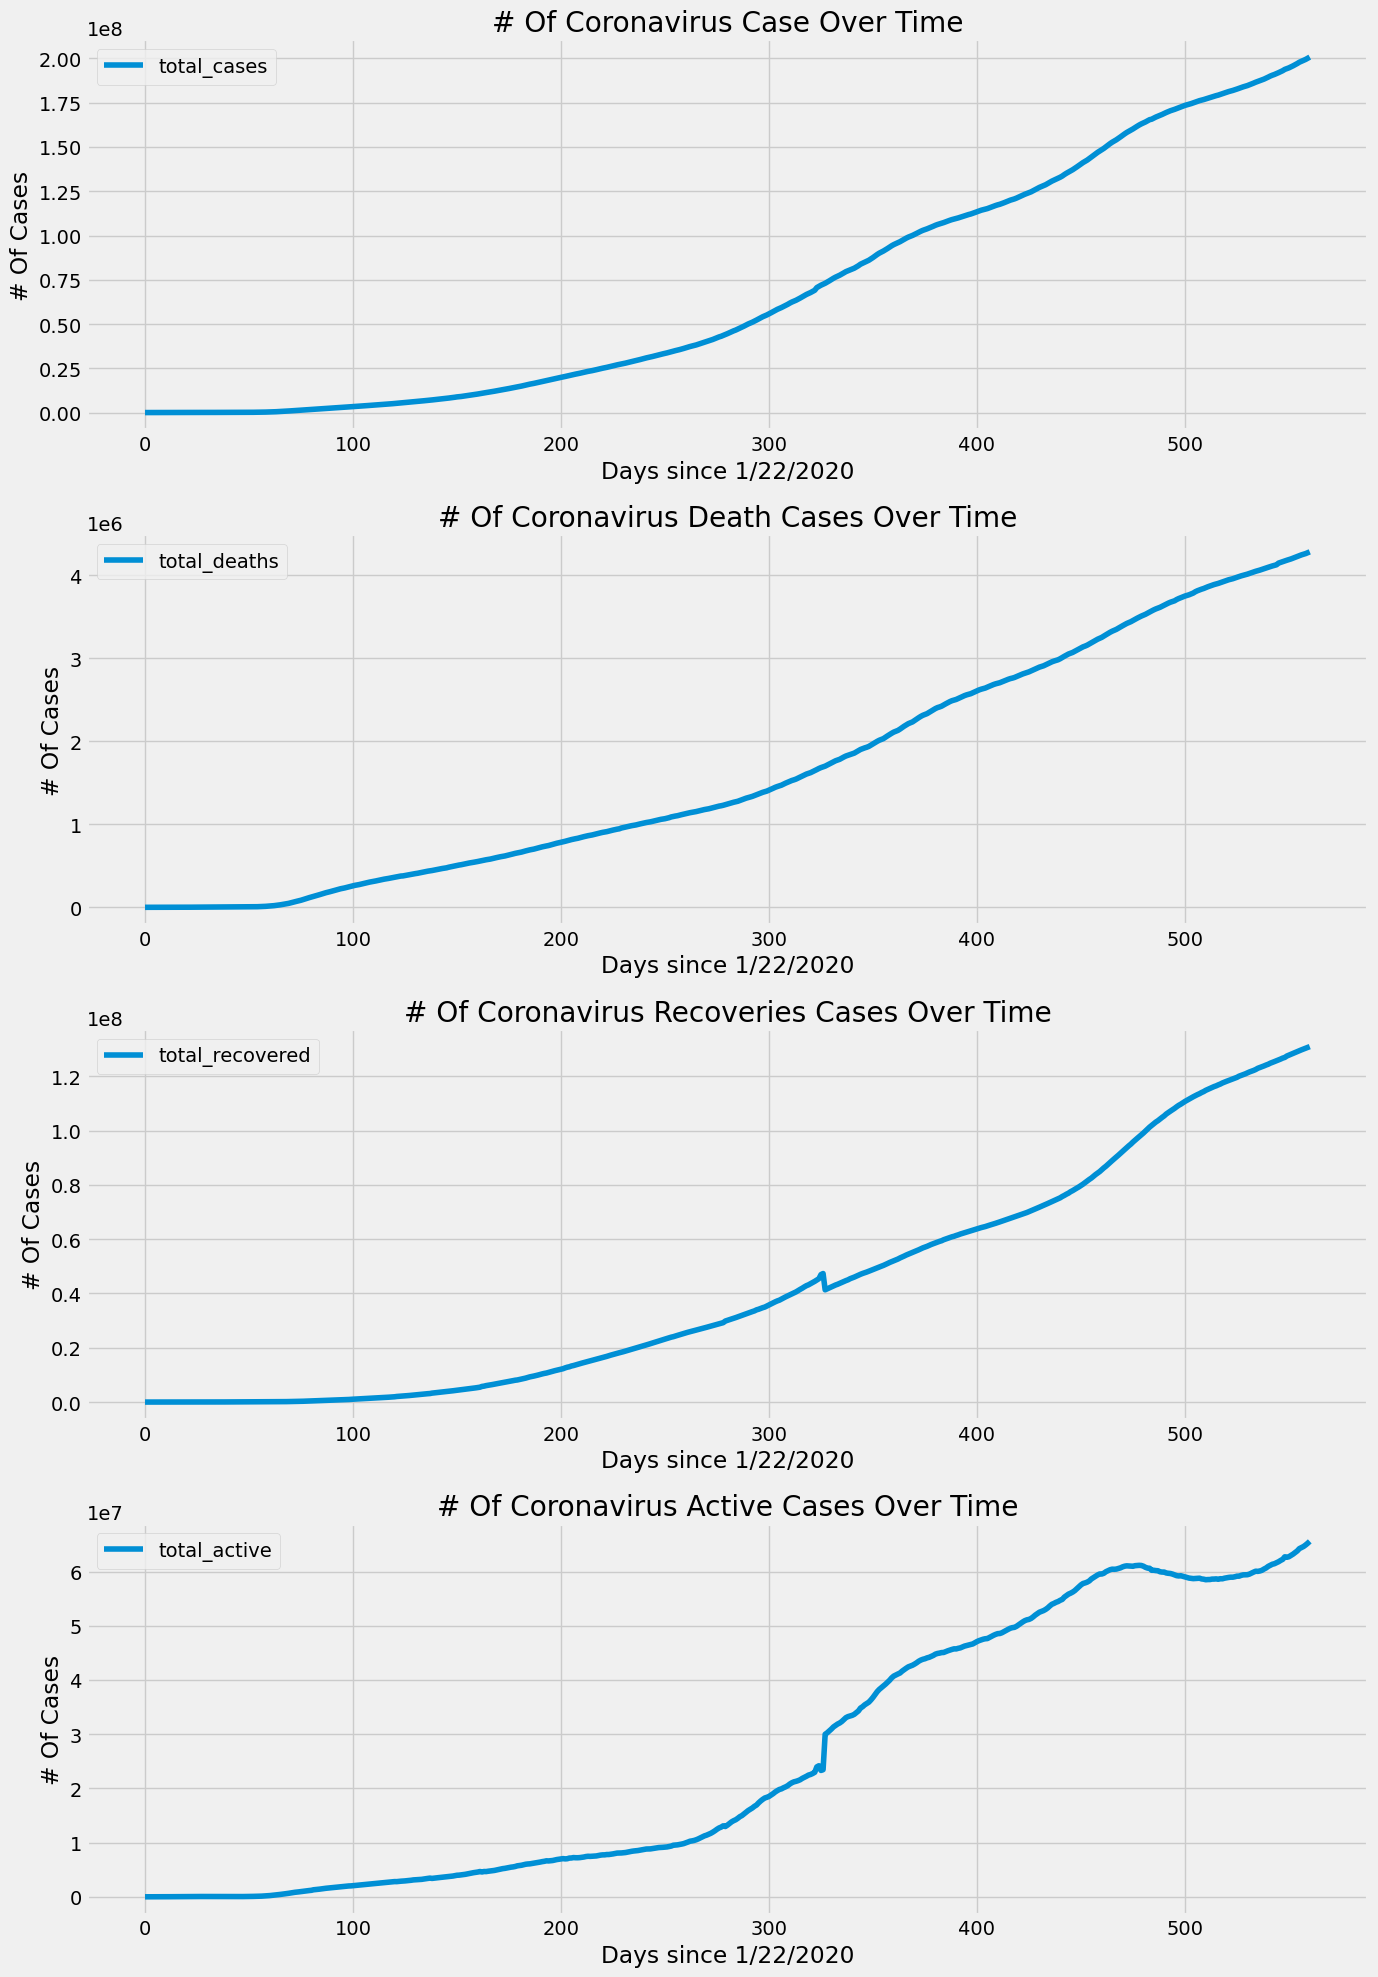

In [117]:
#Nhập mã lập trình của bạn tại đây:
fig = plt.figure()
ax0 = fig.add_subplot(4, 1, 1) 
ax1 = fig.add_subplot(4, 1, 2)
ax2 = fig.add_subplot(4, 1, 3)
ax3 = fig.add_subplot(4, 1, 4)
#subplot1
df['total_cases'].plot(kind='line',figsize=(10,20), ax=ax0)
ax0.set_title('# Of Coronavirus Case Over Time')
ax0.set_ylabel('# Of Cases')
ax0.set_xlabel('Days since 1/22/2020')
ax0.legend(['total_cases'])
#subplot2
df['total_deaths'].plot(kind='line',figsize=(14, 20),ax=ax1)
ax1.set_title('# Of Coronavirus Death Cases Over Time')
ax1.set_ylabel('# Of Cases')
ax1.set_xlabel('Days since 1/22/2020')
ax1.legend(['total_deaths'])
#subplot3
df['total_recovered'].plot(kind='line',figsize=(14, 20),ax=ax2)
ax2.set_title('# Of Coronavirus Recoveries Cases Over Time')
ax2.set_ylabel('# Of Cases')
ax2.set_xlabel('Days since 1/22/2020')
ax2.legend(['total_recovered'])
#subplot4
df['total_active'].plot(kind='line',figsize=(14, 20),ax=ax3)
ax3.set_title('# Of Coronavirus Active Cases Over Time')
ax3.set_ylabel('# Of Cases')
ax3.set_xlabel('Days since 1/22/2020')
ax3.legend(['total_active'])
# Tạo khoảng cách giữa các subplot
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [118]:
#Nhập mã lập trình của bạn tại đây:
increases_case = []
increases_death = []
increases_recovered = []
increases_active = []
for i in adjusted_dates:
    if i==0:
        increases_case.append(0)
        increases_death.append(0)
        increases_recovered.append(0)
        increases_active.append(0)
    else:
        increases_case.append(total_cases[i]-total_cases[i-1])
        increases_death.append(total_deaths[i]-total_deaths[i-1])
        increases_recovered.append(total_recovered[i]-total_recovered[i-1])
        increases_active.append(total_active[i]-total_active[i-1])
##Tạo dataframe chứa kết quả
df_increase=pd.DataFrame()
df_increase['increases_case']=increases_case
df_increase['increases_death']=increases_death
df_increase['increases_recovered']=increases_recovered
df_increase['increases_active']=increases_active
df_increase

increases_case  increases_death  increases_recovered  increases_active
0                 0                0                    0                 0
1               100                1                    2                97
2               287                8                    7               272
3               493               16                    3               474
4               683               14                   14               655
..              ...              ...                  ...               ...
556          517345             8844               303929            204572
557          483068             7419               289178            186471
558          571103             8151               283144            279808
559          634275            10353               304468            319454
560          680458            10492               317060            352906

[561 rows x 4 columns]

## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

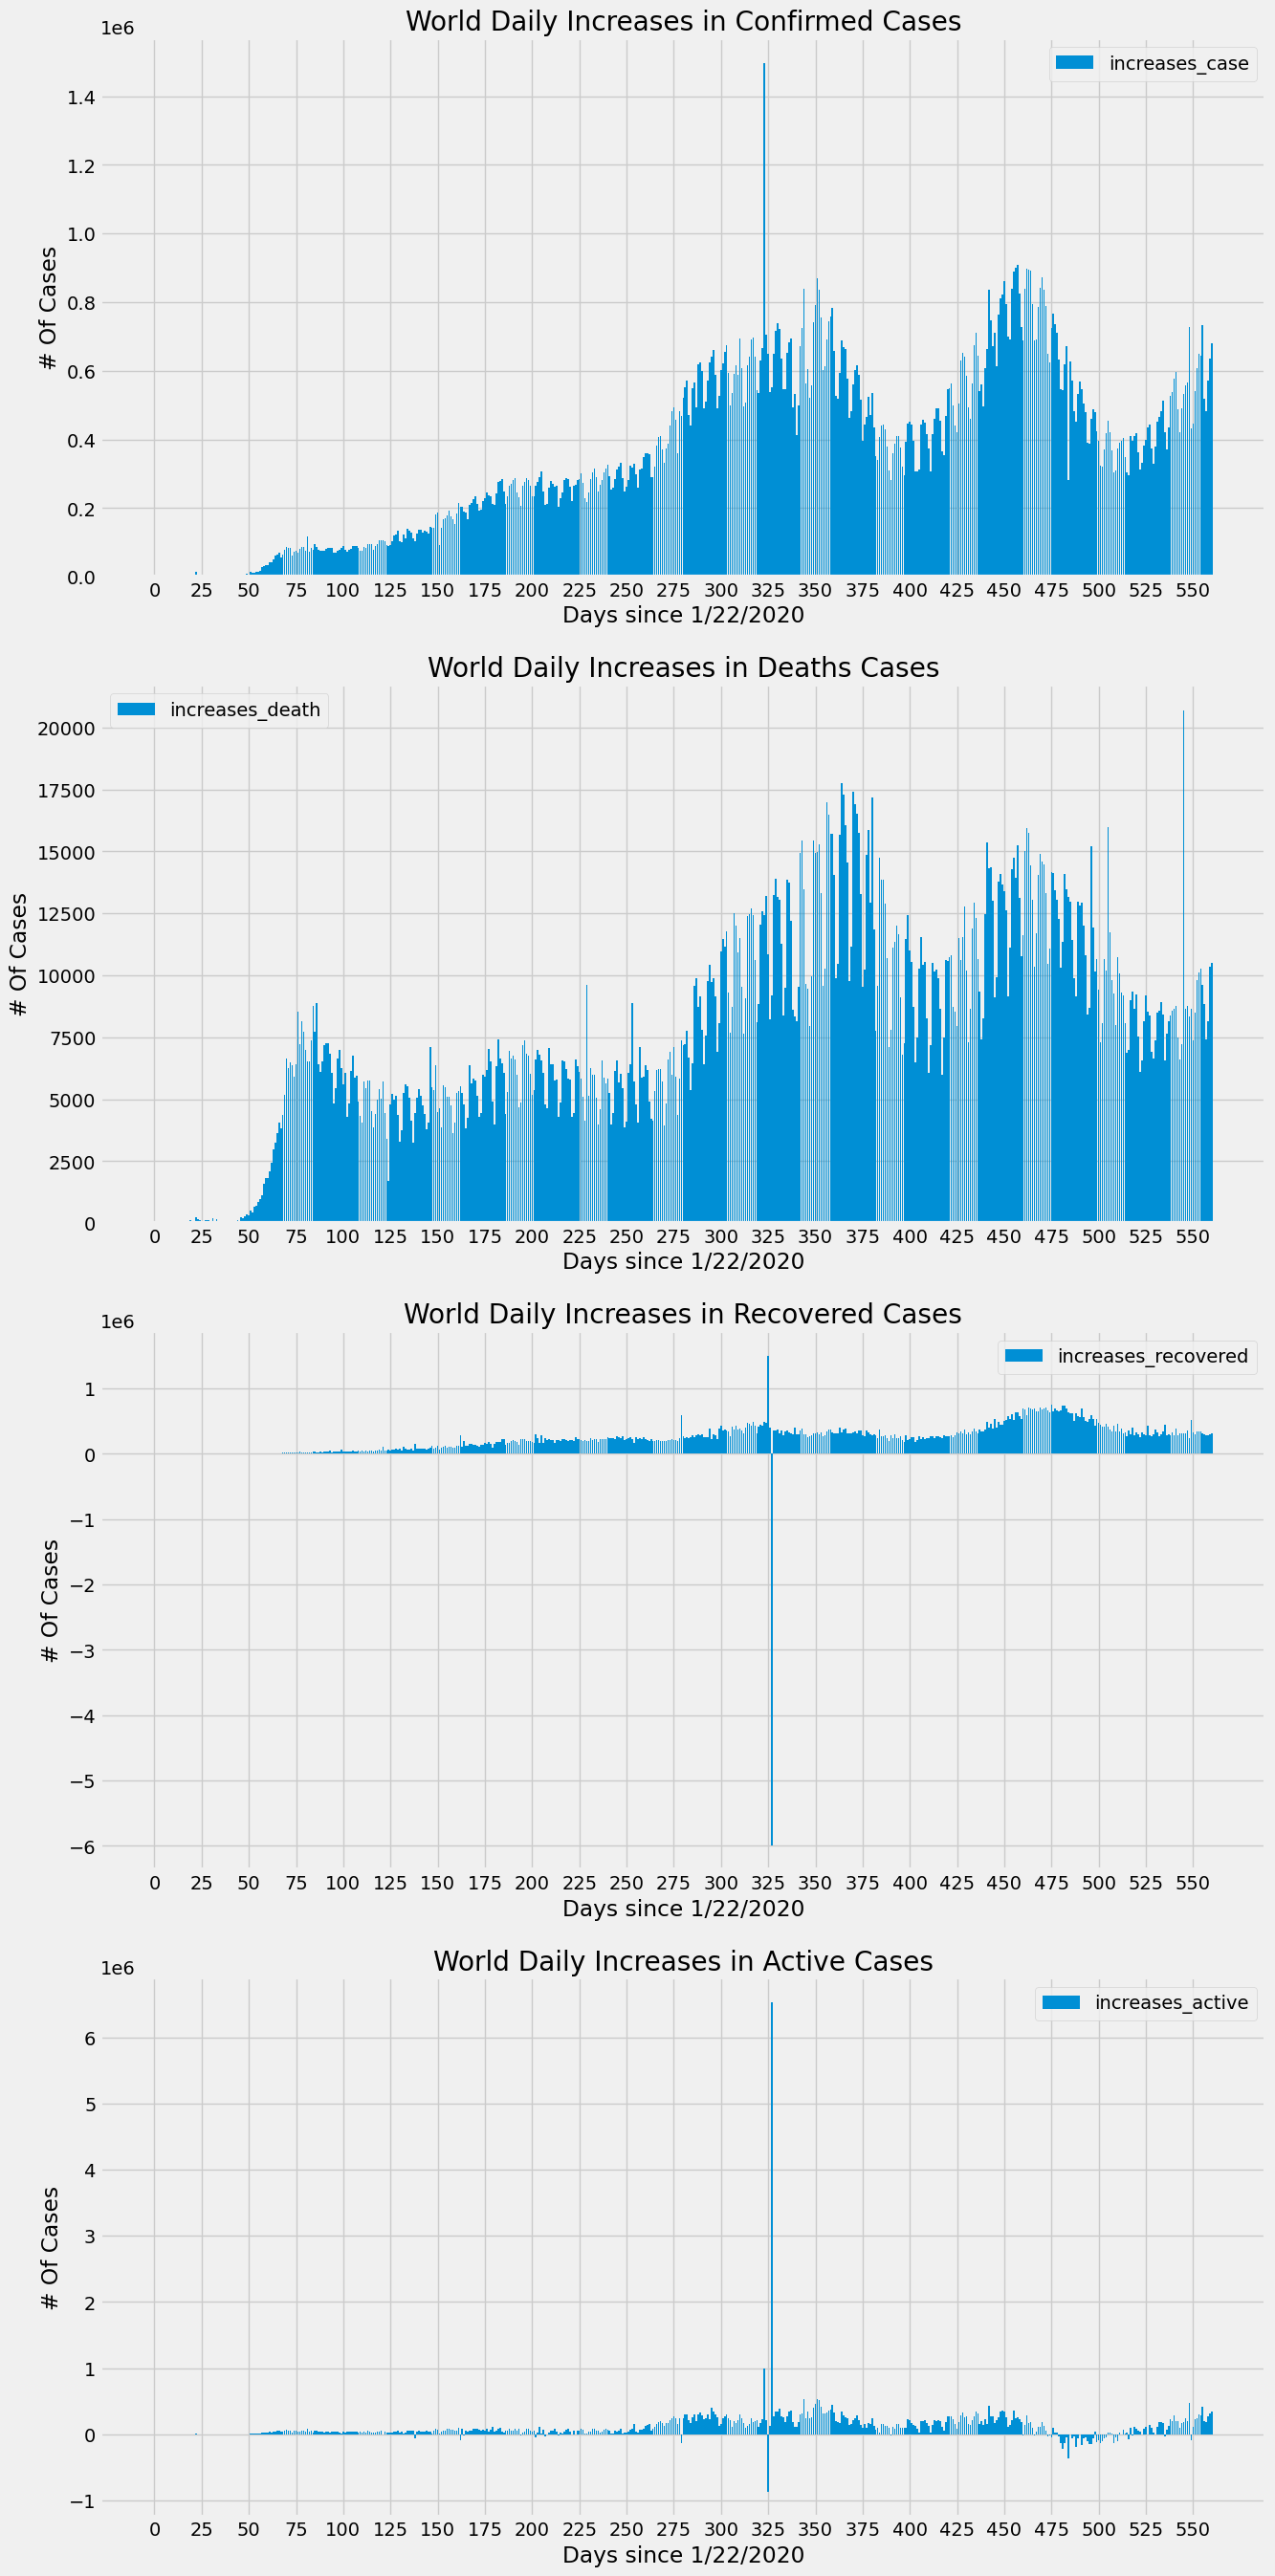

In [119]:
#Nhập mã lập trình của bạn tại đây:
list_name=['Confirmed', 'Deaths','Recovered','Active']
#Tạo lập biểu đồ
fig, axes = plt.subplots(len(df_increase.columns), 1, figsize=(14, 8 * (len(df_increase.columns))))
# Đoạn mã tiếp theo của bạn
for i, ax in enumerate(axes):
    # Vẽ biểu đồ tròn trong từng axes
    ax.bar(df_increase.index, df_increase.iloc[:, i])
    ax.set_xlabel('Days since 1/22/2020')
    ax.set_ylabel('# Of Cases')
    ax.set_title('World Daily Increases in ' + list_name[i] + ' Cases')
    ax.set_xticks(range(0,len(df_increase.index),25))
    ax.legend(df_increase.columns[i:])
plt.show()

# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [120]:
#Nhập mã lập trình của bạn tại đây:
mortality_rate = []
recovery_rate = []
for i in adjusted_dates:
    mortality_rate.append(100*total_deaths[i]/total_cases[i])
    recovery_rate.append(100*total_recovered[i]/total_cases[i])
mortality_rate[-1],recovery_rate[-1]

(2.1334160808104508, 65.20222238263601)

# Bài toán 7
**7.1** 

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

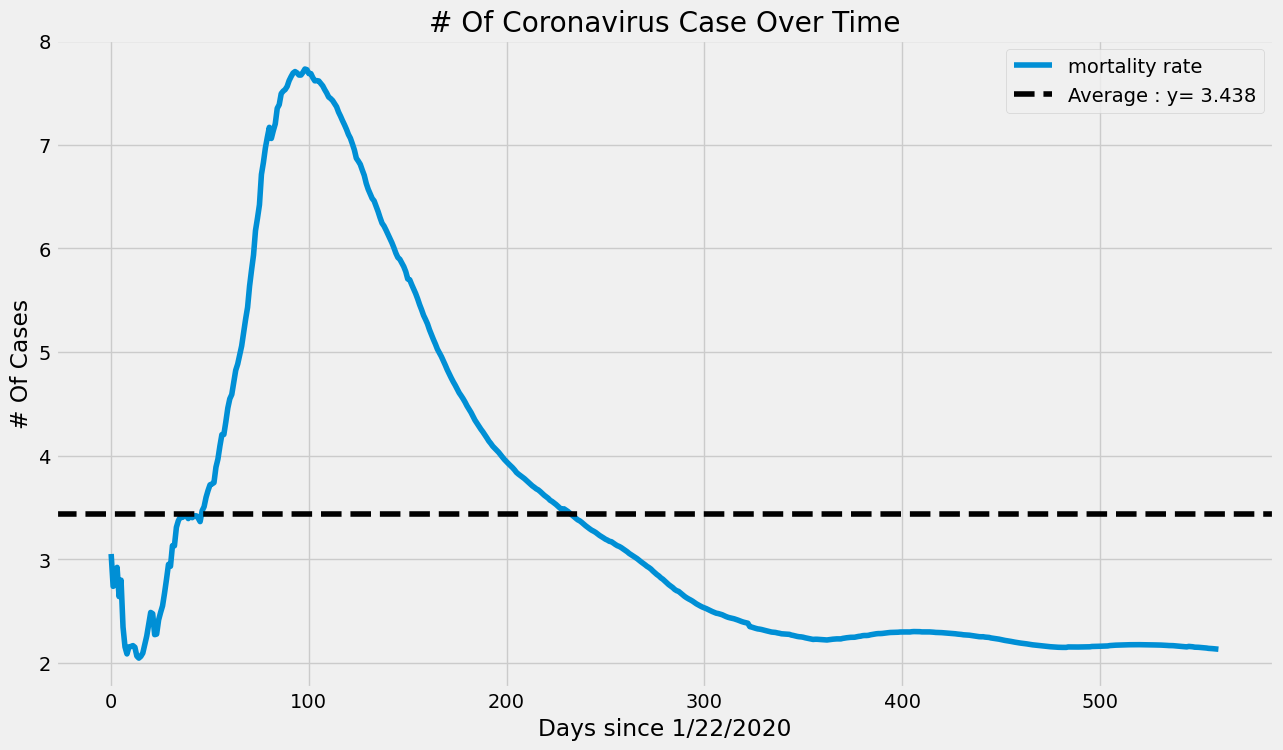

In [121]:
#Nhập mã lập trình của bạn tại đây:
df_rtdeath=pd.DataFrame()
df_rtdeath['mortality rate']=mortality_rate
mean_rtdeath=np.mean(mortality_rate)
df_rtdeath.plot(kind='line', figsize=(14, 8))
plt.axhline(mean_rtdeath, color='black', linestyle='--')
plt.title('# Of Coronavirus Case Over Time')
plt.ylabel('# Of Cases')
plt.xlabel('Days since 1/22/2020')
plt.legend(['mortality rate', 'Average : y= {:.3f}'.format(mean_rtdeath)])
plt.show()



**7.2** 

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

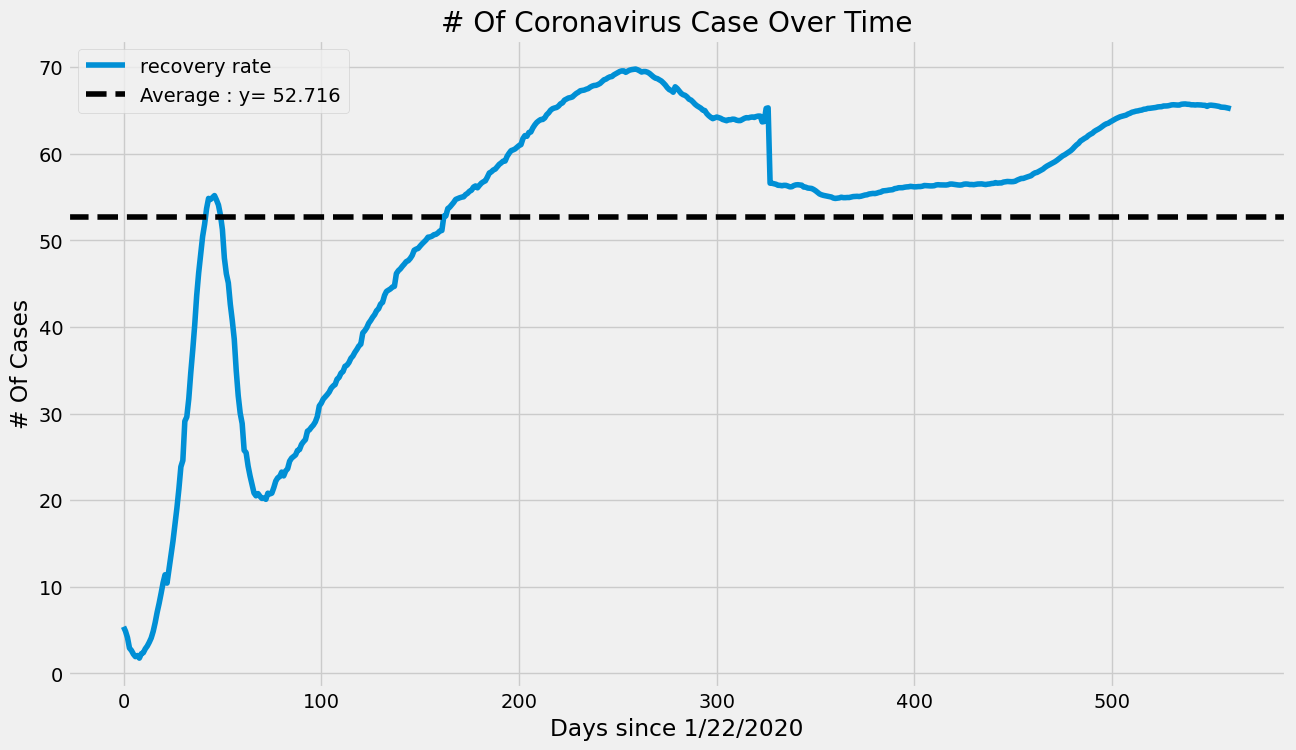

In [122]:
#Nhập mã lập trình của bạn tại đây:
df_rtrecover=pd.DataFrame()
df_rtrecover['recovery rate']=recovery_rate
mean_rtrecover=np.mean(recovery_rate)
df_rtrecover.plot(kind='line', figsize=(14, 8))
plt.axhline(mean_rtrecover, color='black', linestyle='--')
plt.title('# Of Coronavirus Case Over Time')
plt.ylabel('# Of Cases')
plt.xlabel('Days since 1/22/2020')
plt.legend(['recovery rate', 'Average : y= {:.3f}'.format(mean_rtrecover)])
plt.show()

#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [123]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [159]:
new_confirmed=pd.DataFrame(confirmed_df.copy())
new_deaths=deaths_df.copy()
new_recoveries=recoveries_df.copy()
new_confirmed

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  \
0          0        0        0        0        0  ...   144285   145008   
1          0        0        0        0        0  ...   132891   132922   
2          0        0        0        0        0  ...   163660   165204   
3          0        0        0        0        0  ...    14577    14586   
4          0        0        0        0        0  ...    41879    42110   
..       ...      ...      ...      ...      ...  ...      ...      ...   
284        0        0        0        0        0  ...   316088   316189   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...     7012     7022   
287        0        0        0        0        0  ...   192316   192956   
288        0        0        0        0        0  ...    99944   101711   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     145552   145996   146523   147154  147501  147985  148572  148933  
1     132952   132999   133036   133081  133121  133146  133211  133310  
2     167131   168668   170189   171392  172564  173922  175229  176724  
3      14586    14655    14678    14678   14678   14747   14766   14797  
4      42288    42486    42646    42777   42815   42970   43070   43158  
..       ...      ...      ...      ...     ...     ...     ...     ...  
284   316328   316487   316603   316738  316861  317083  317264  317404  
285        0        0        0        0       0       0       0       0  
286     7027     7042     7058     7061    7070    7081    7086    7096  
287   193432   194140   195096   195816  196293  196490  197123  197791  
288   103567   105656   107490   108860  109546  110855  112435  113526  

[289 rows x 565 columns]

In [163]:
#Nhập mã lập trình của bạn tại đây
## Bảng confirm
code_continent =[]
for i in new_confirmed.index.tolist():
    code_continent.append(country_to_continent_code(new_confirmed['Country/Region'].iloc[i]))
continent = []
for item in code_continent:
    new_name = continents.get(item)  
    continent.append(new_name)
#new_confirmed.insert(2,'continent',continent)
#Bảng death
code_continent2 =[]
for i in deaths_df.index.tolist():
    code_continent2.append(country_to_continent_code(deaths_df['Country/Region'].iloc[i]))
continent2 = []
for item in code_continent2:
    new_name = continents.get(item)  
    continent2.append(new_name)
#new_deaths.insert(2,'continent',continent2)
#Bảng recoveries
code_continent3 =[]
for i in recoveries_df.index.tolist():
    code_continent3.append(country_to_continent_code(recoveries_df['Country/Region'].loc[i]))
continent3 = []
for item in code_continent3:
    new_name = continents.get(item)  
    continent3.append(new_name)
#new_recoveries.insert(2,'continent',continent3)
new_confirmed

Province/State        Country/Region continent        Lat        Long  \
0              NaN           Afghanistan      Asia  33.939110   67.709953   
1              NaN               Albania    Europe  41.153300   20.168300   
2              NaN               Algeria    Africa  28.033900    1.659600   
3              NaN               Andorra    Europe  42.506300    1.521800   
4              NaN                Angola    Africa -11.202700   17.873900   
..             ...                   ...       ...        ...         ...   
284            NaN    West Bank and Gaza    Others  31.952200   35.233200   
285            NaN  Winter Olympics 2022    Others  39.904200  116.407400   
286            NaN                 Yemen      Asia  15.552727   48.516388   
287            NaN                Zambia    Africa -13.133897   27.849332   
288            NaN              Zimbabwe    Africa -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  \
0          0        0        0        0        0  ...   144285   145008   
1          0        0        0        0        0  ...   132891   132922   
2          0        0        0        0        0  ...   163660   165204   
3          0        0        0        0        0  ...    14577    14586   
4          0        0        0        0        0  ...    41879    42110   
..       ...      ...      ...      ...      ...  ...      ...      ...   
284        0        0        0        0        0  ...   316088   316189   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...     7012     7022   
287        0        0        0        0        0  ...   192316   192956   
288        0        0        0        0        0  ...    99944   101711   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     145552   145996   146523   147154  147501  147985  148572  148933  
1     132952   132999   133036   133081  133121  133146  133211  133310  
2     167131   168668   170189   171392  172564  173922  175229  176724  
3      14586    14655    14678    14678   14678   14747   14766   14797  
4      42288    42486    42646    42777   42815   42970   43070   43158  
..       ...      ...      ...      ...     ...     ...     ...     ...  
284   316328   316487   316603   316738  316861  317083  317264  317404  
285        0        0        0        0       0       0       0       0  
286     7027     7042     7058     7061    7070    7081    7086    7096  
287   193432   194140   195096   195816  196293  196490  197123  197791  
288   103567   105656   107490   108860  109546  110855  112435  113526  

[289 rows x 566 columns]

# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Deaths: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [164]:
#Nhập mã lập trình của bạn tại đây:
d=recoveries_df.groupby('Country/Region').sum()
d=d.iloc[:,-1]
b=confirmed_df.groupby('Country/Region').sum()
b= b.iloc[:,-1]
c=deaths_df.groupby('Country/Region').sum()
c= c.iloc[:,-1]
merged_df = pd.merge(b, c, left_index=True, right_index=True, how='inner')
final_merged_df = pd.merge(merged_df,d,left_index=True, right_index=True, how='inner')
country_df=pd.DataFrame(final_merged_df)
country_df.rename(columns={country_df.columns[0]: 'Confirmed'}, inplace=True)
country_df.rename(columns={country_df.columns[1]: 'Deaths'}, inplace=True)
country_df.rename(columns={country_df.columns[2]: 'Recoveries'}, inplace=True)
country_df['Active']=country_df['Confirmed']-country_df['Deaths']-country_df['Recoveries']
country_df['Mortality Rate']=100* (country_df['Deaths']/country_df['Confirmed'])
country_df['Mortality Rate']=country_df['Mortality Rate'].apply(lambda x: round(x,2))
#chèn cột continent
code_continent4 =[]
for i in country_df.index:
    code_continent4.append(country_to_continent_code(i))
continent4 = []
for item in code_continent4:
    new_name = continents.get(item)  
    continent4.append(new_name)
country_df.insert(0,'continent',continent4)
#country_df.rename(columns={'Continent': 'continent'}, inplace=True)
country_df

continent  Confirmed  Deaths  Recoveries  Active  \
Country/Region                                                          
Afghanistan               Asia     148933    6836       82586   59511   
Albania                 Europe     133310    2457      130314     539   
Algeria                 Africa     176724    4404      118409   53911   
Andorra                 Europe      14797     128       14380     289   
Angola                  Africa      43158    1026       39582    2550   
...                        ...        ...     ...         ...     ...   
West Bank and Gaza      Others     317404    3609      312320    1475   
Winter Olympics 2022    Others          0       0           0       0   
Yemen                     Asia       7096    1380        4251    1465   
Zambia                  Africa     197791    3430      189658    4703   
Zimbabwe                Africa     113526    3711       82994   26821   

                      Mortality Rate  
Country/Region                        
Afghanistan                     4.59  
Albania                         1.84  
Algeria                         2.49  
Andorra                         0.87  
Angola                          2.38  
...                              ...  
West Bank and Gaza              1.14  
Winter Olympics 2022             NaN  
Yemen                          19.45  
Zambia                          1.73  
Zimbabwe                        3.27  

[201 rows x 6 columns]

# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [165]:
#Nhập mã lập trình của bạn tại đây:
continent_group = country_df.groupby('continent')[['Confirmed', 'Deaths', 'Recoveries','Active']].sum()
Continental_df=pd.DataFrame(continent_group)
Continental_df['Mortality Rate']=100* (Continental_df['Deaths']/Continental_df['Confirmed'])
Continental_df['Mortality Rate']=Continental_df['Mortality Rate'].apply(lambda x: round(x,2))
Continental_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate
continent                                                              
Africa           6855602   174000     5955131    726471            2.54
Asia            62536726   902952    57853343   3780431            1.44
Australia          90000     1425       55290     33285            1.58
Europe          52448545  1167140    27947075  23334330            2.23
North America   42351963   924518     5776939  35650506            2.18
Others            753558    16614      654615     82329            2.20
South America   35722194  1096367    32656668   1969159            3.07

## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [166]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Bài toán 11
**11.1** 

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

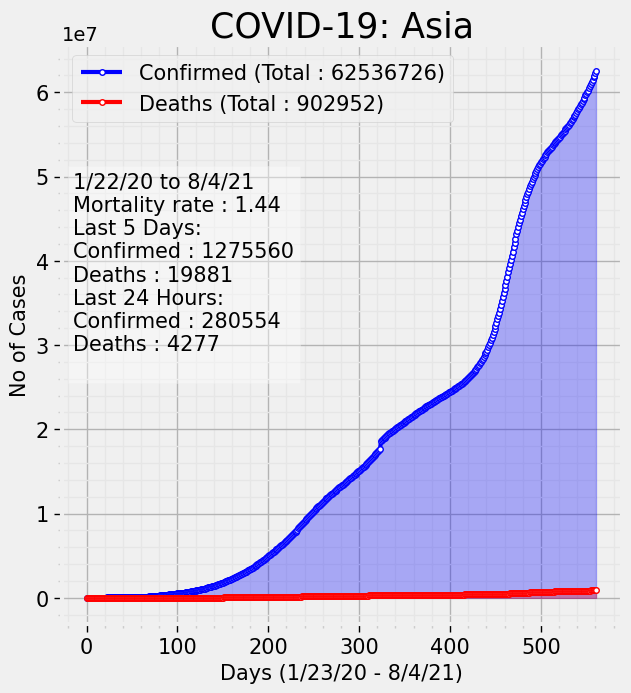

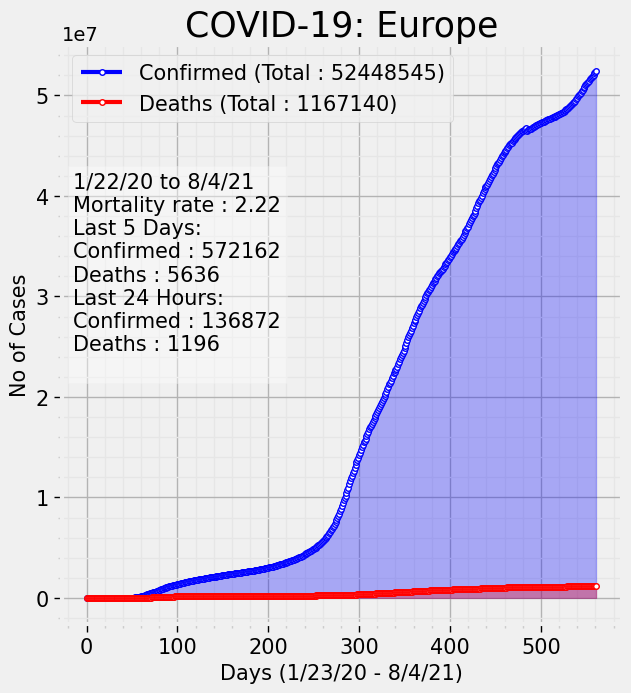

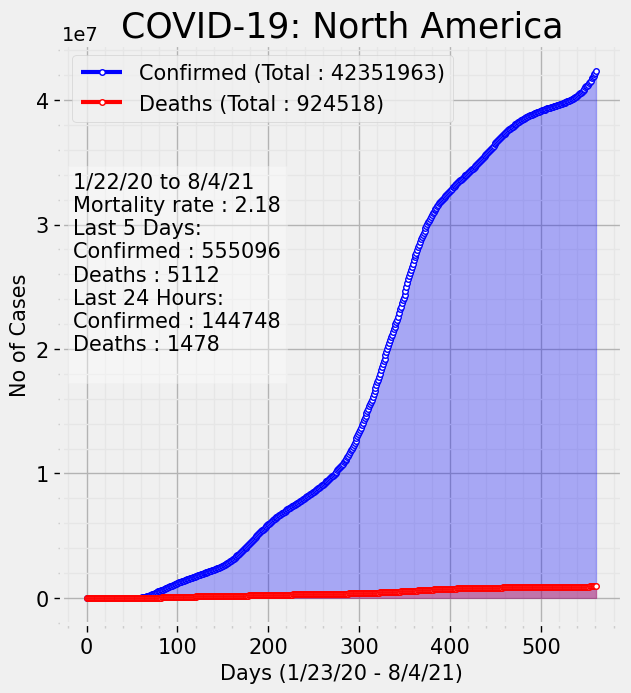

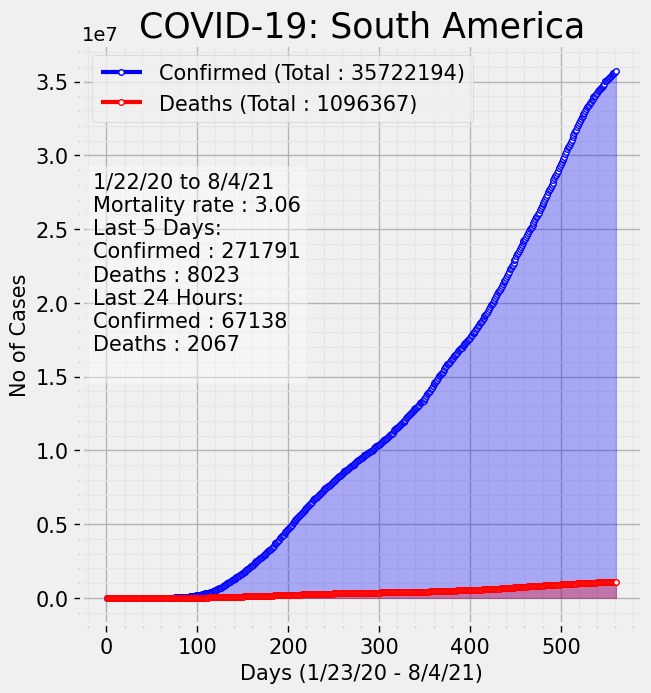

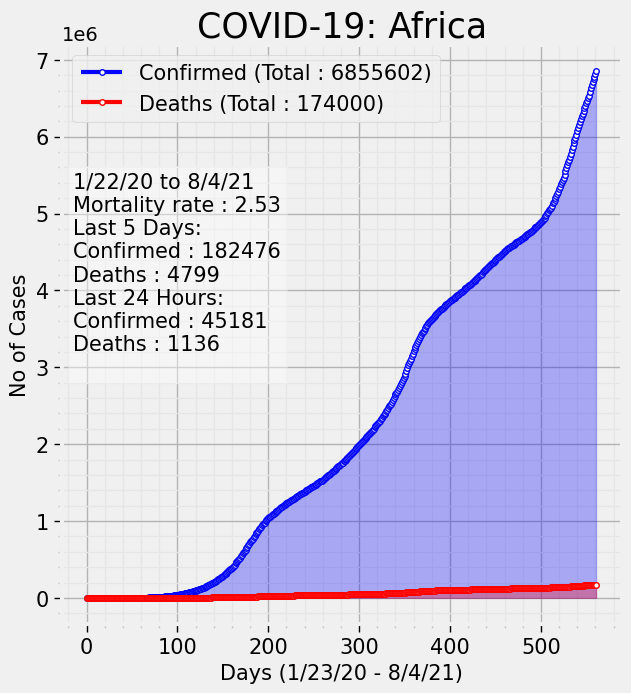

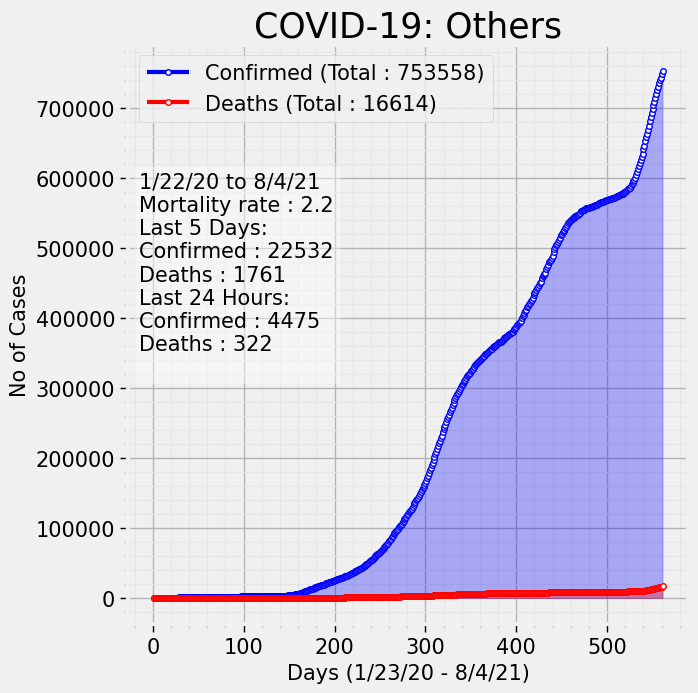

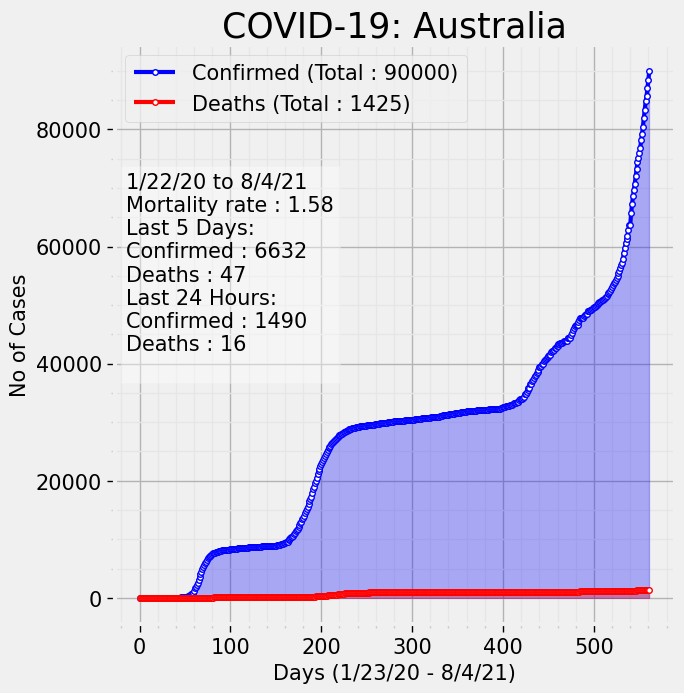

In [168]:
#Nhập mã lập trình của bạn tại đây:
Continental_df=Continental_df.sort_values('Confirmed',ascending = False)
for item in Continental_df.index:
    visualize_covid_cases(new_confirmed,new_deaths,continent=item ,scale = "linear")



**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để: 
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

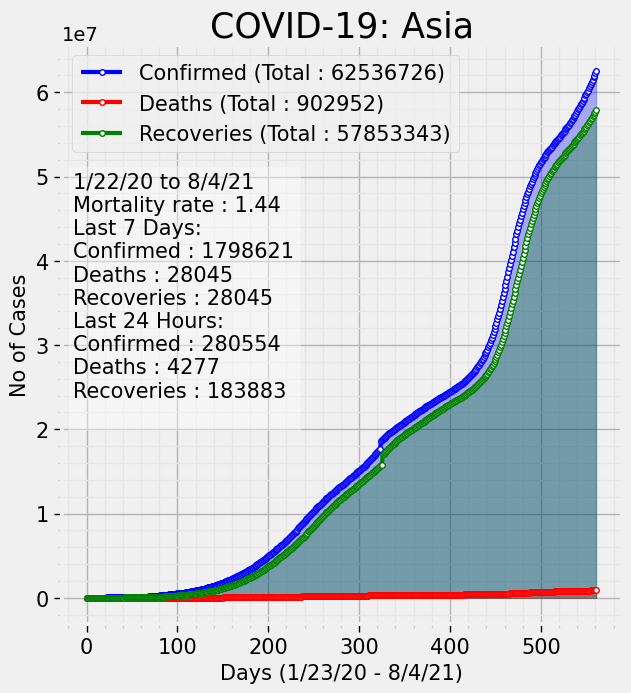

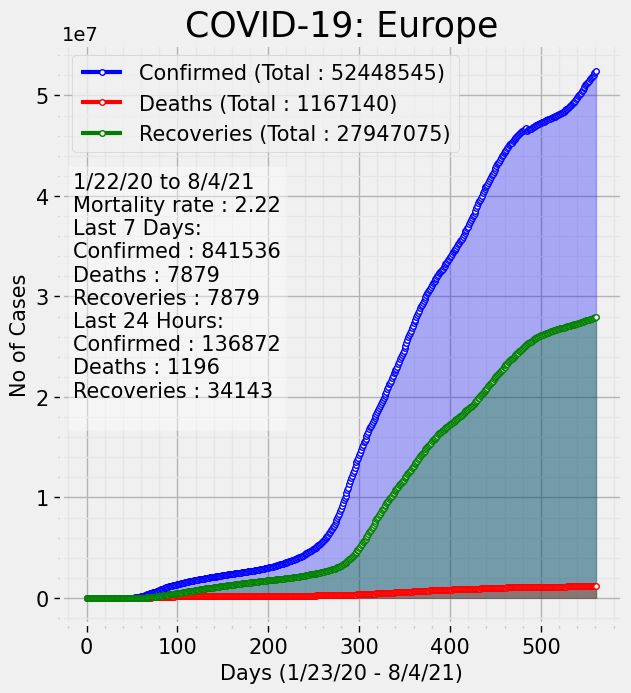

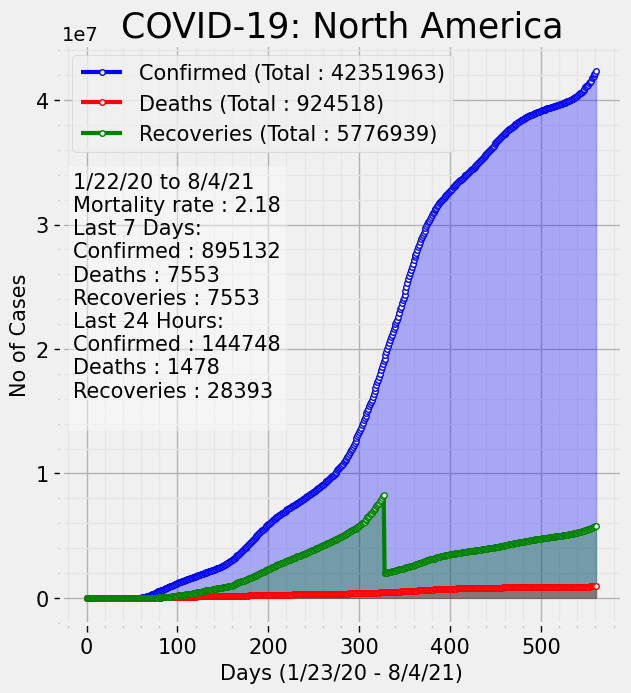

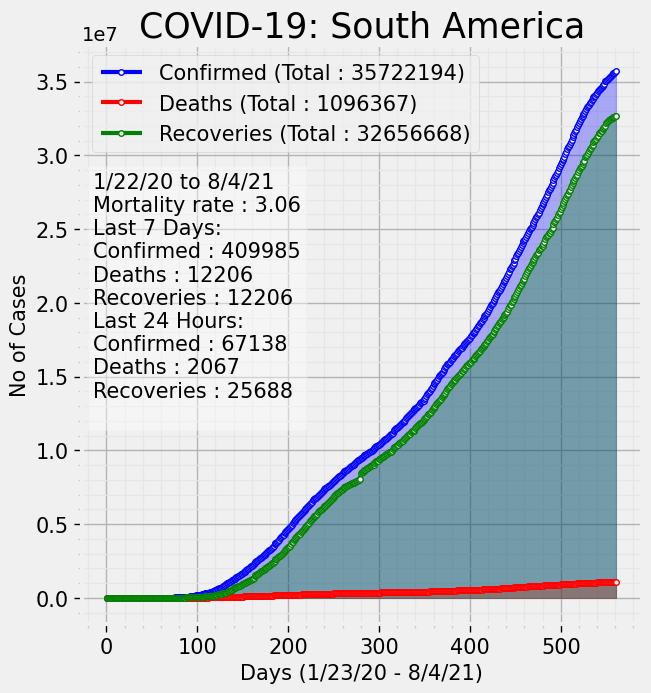

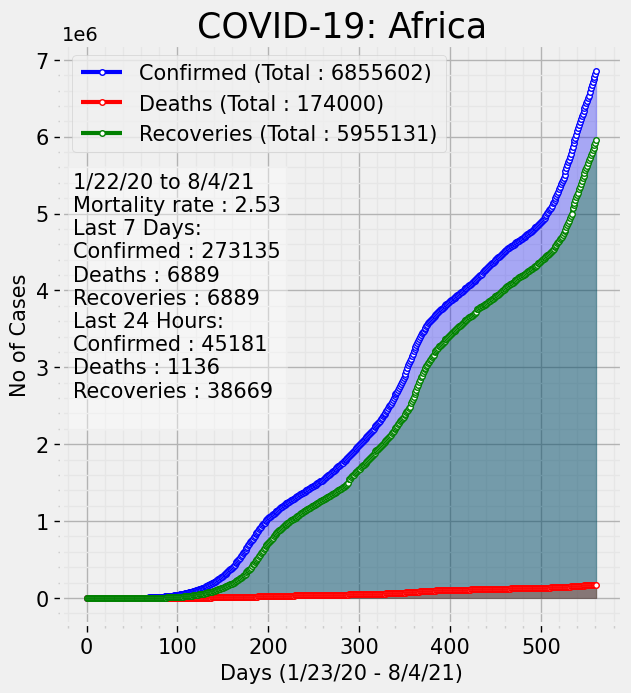

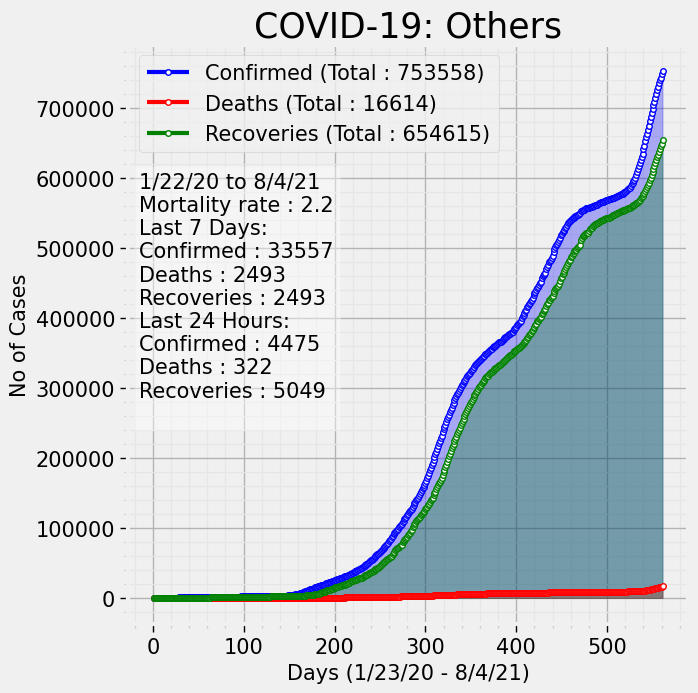

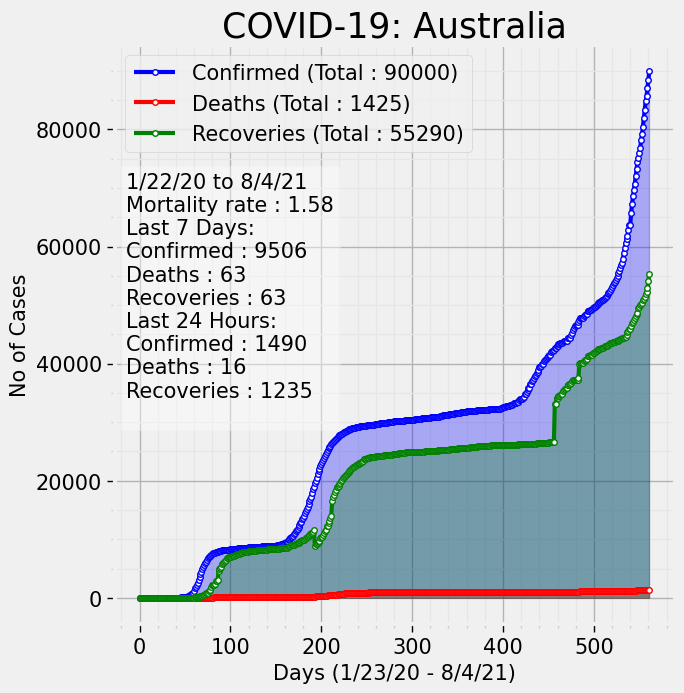

In [170]:
#Nhập mã lập trình của bạn tại đây:
def visualize_covid_cases2(confirmed, deaths,recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths","Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
# show biểu đồ
for item in Continental_df.index:
    visualize_covid_cases2(new_confirmed,new_deaths,new_recoveries, continent=item ,scale = "linear")

# Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

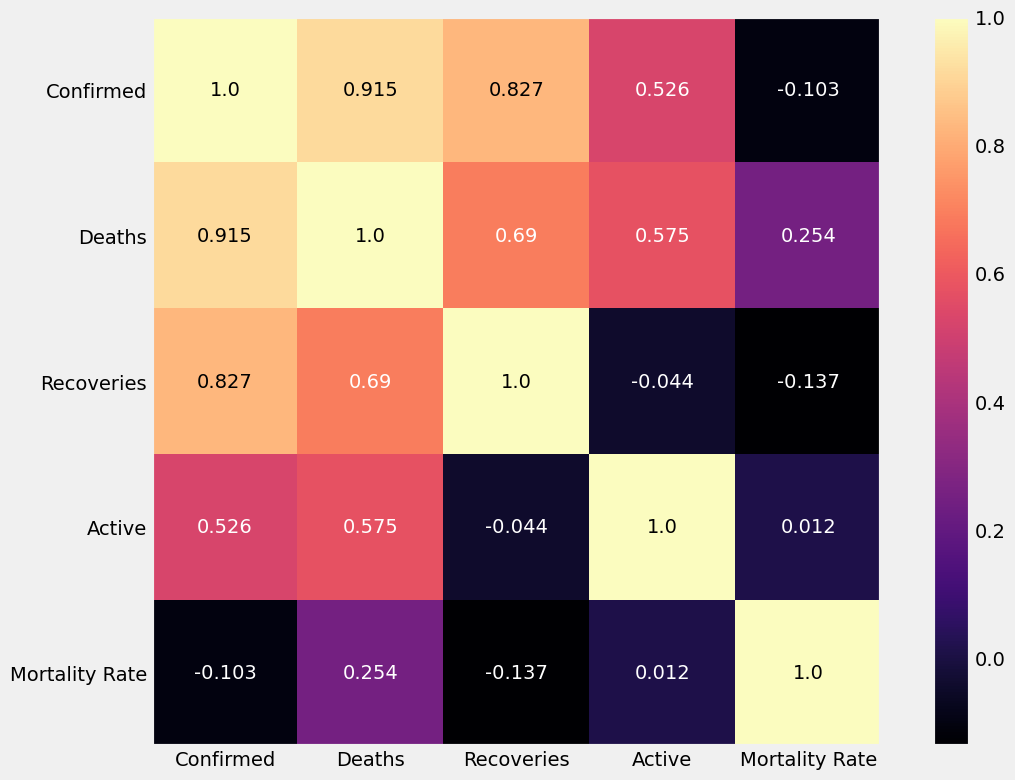

In [171]:
#Nhập mã lập trình của bạn tại đây:

corr_matrix = Continental_df.corr()

# Vẽ biểu đồ hệ số tương quan
plt.figure(figsize=(12, 9))
plt.imshow(corr_matrix, cmap='magma', interpolation='nearest')
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, round(corr_matrix.iloc[i, j],3), ha='center', va='center',
                 color='w' if abs(corr_matrix.iloc[i, j]) < 0.7 else 'black')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.grid(False)
plt.show()

# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

In [175]:
Continental_df=Continental_df.sort_index()

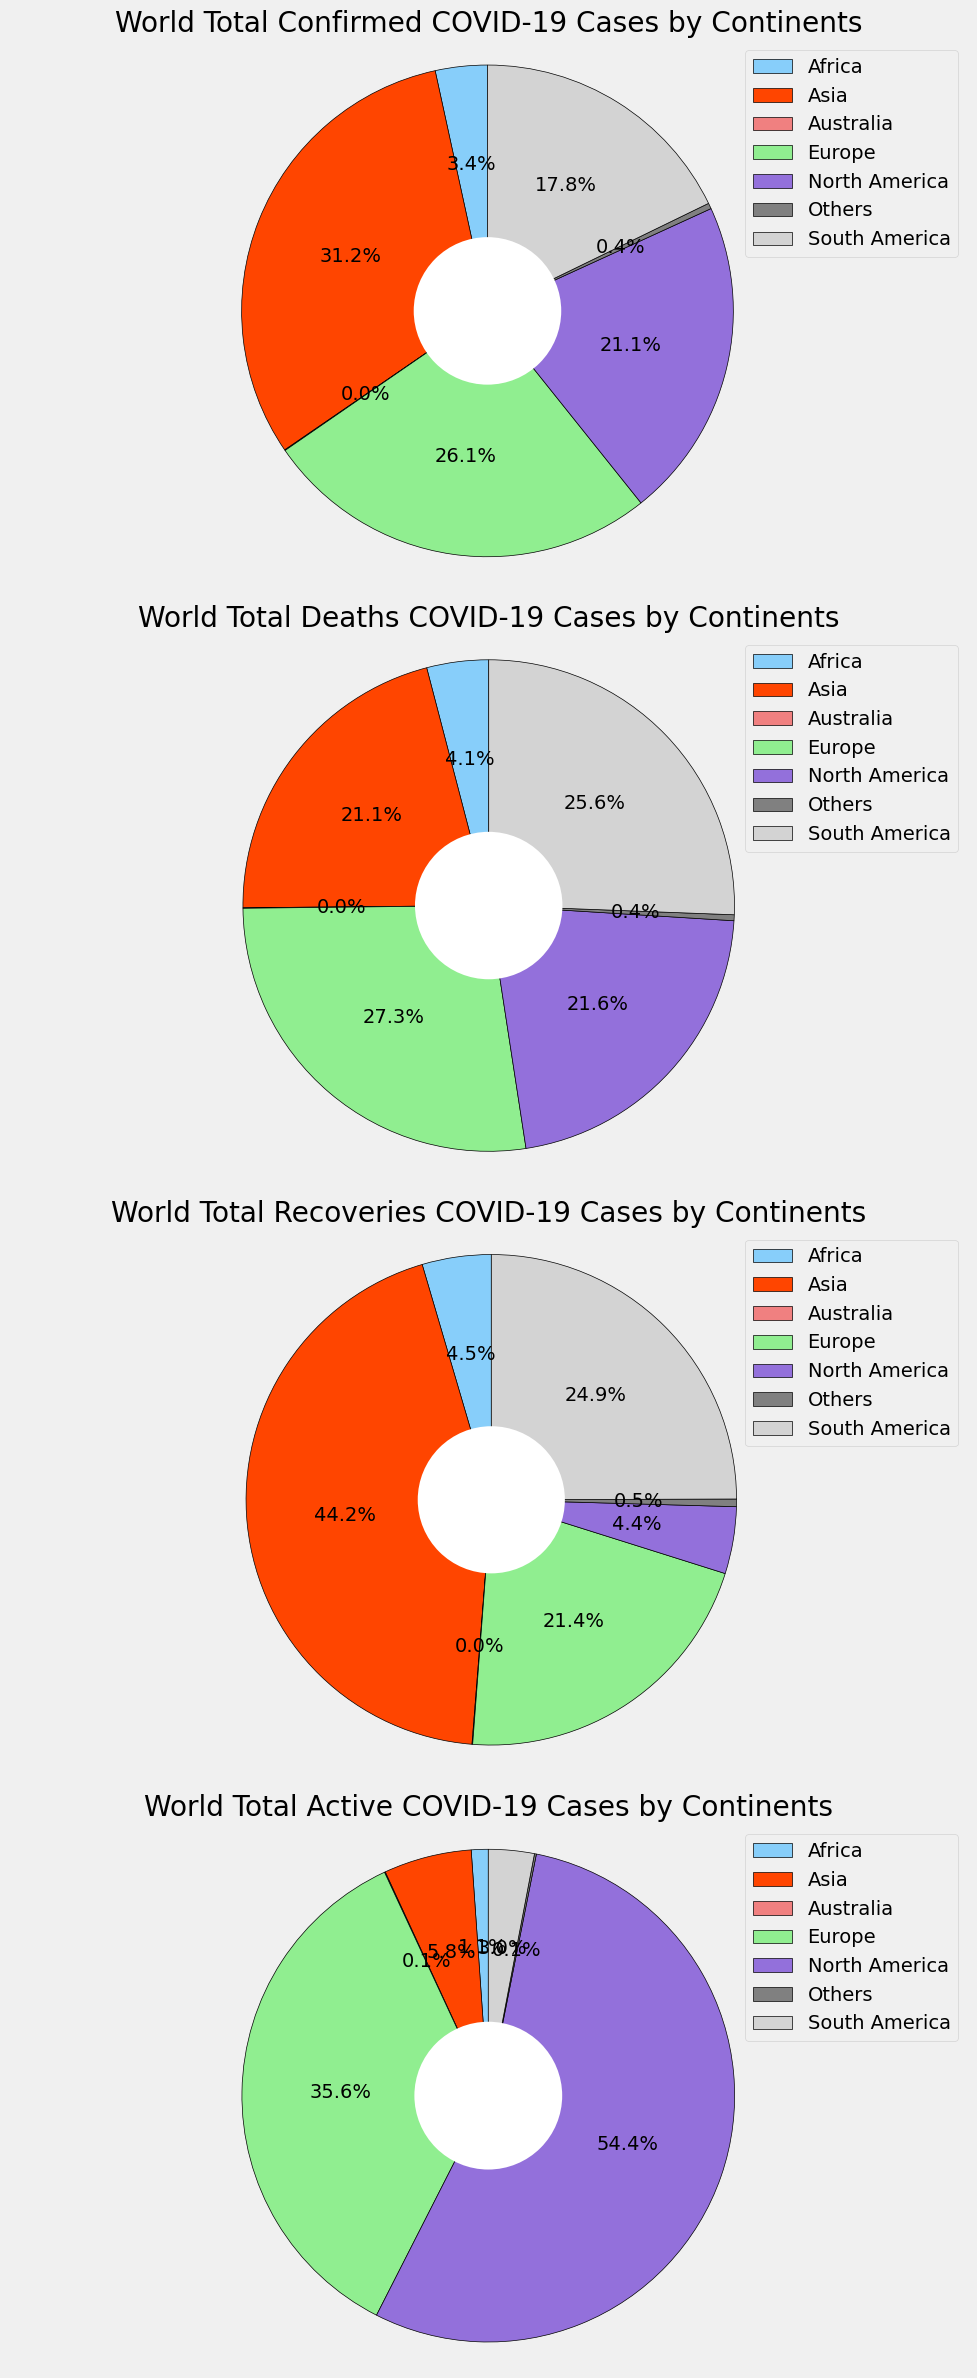

In [176]:
#Nhập mã lập trình của bạn tại đây:

colors_list = ['lightskyblue', 'orangered', 'lightcoral', 'lightgreen', 'mediumpurple', 'gray','lightgray']

# Tạo một figure và các axes dọc
fig, axes = plt.subplots(len(Continental_df.columns)-1, 1, figsize=(10, 6 * (len(Continental_df.columns)-1)))

# Đoạn mã tiếp theo của bạn
for i, ax in enumerate(axes):
    # Vẽ biểu đồ tròn trong từng axes
    patches= ax.pie(Continental_df.iloc[:, i], 
           autopct='%1.1f%%',
           startangle=90,
           colors=colors_list)
    for patch in patches[0]:
        patch.set_edgecolor('black')
    # Lỗ tròn trắng
    center_circle = plt.Circle((0, 0), 0.3, fc='white')
    ax.add_artist(center_circle)
    
    # Thiết lập tỉ lệ trục x và y bằng nhau để tạo ra hình tròn
    ax.axis('equal')
    
    ax.set_title('World Total ' + Continental_df.columns[i] + ' COVID-19 Cases by Continents')
    legend=ax.legend(labels=Continental_df.index, loc='upper right')
    for patch in legend.get_patches():
        patch.set_edgecolor('black')
plt.tight_layout()  # Để tránh trùng lắp nội dung
plt.show()


# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [177]:
c = confirmed_df.groupby('Country/Region')[['Lat', 'Long']].mean()
c=c[['Lat', 'Long']]
all_country_df = country_df.merge(c, left_on=country_df.index, right_on=c.index, how='inner')
all_country_df.rename(columns={'key_0':'Country'},inplace=True)
all_country_df

Country continent  Confirmed  Deaths  Recoveries  Active  \
0             Afghanistan      Asia     148933    6836       82586   59511   
1                 Albania    Europe     133310    2457      130314     539   
2                 Algeria    Africa     176724    4404      118409   53911   
3                 Andorra    Europe      14797     128       14380     289   
4                  Angola    Africa      43158    1026       39582    2550   
..                    ...       ...        ...     ...         ...     ...   
196    West Bank and Gaza    Others     317404    3609      312320    1475   
197  Winter Olympics 2022    Others          0       0           0       0   
198                 Yemen      Asia       7096    1380        4251    1465   
199                Zambia    Africa     197791    3430      189658    4703   
200              Zimbabwe    Africa     113526    3711       82994   26821   

     Mortality Rate        Lat        Long  
0              4.59  33.939110   67.709953  
1              1.84  41.153300   20.168300  
2              2.49  28.033900    1.659600  
3              0.87  42.506300    1.521800  
4              2.38 -11.202700   17.873900  
..              ...        ...         ...  
196            1.14  31.952200   35.233200  
197             NaN  39.904200  116.407400  
198           19.45  15.552727   48.516388  
199            1.73 -13.133897   27.849332  
200            3.27 -19.015438   29.154857  

[201 rows x 9 columns]

In [181]:
# Tạo map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Loop through the rows of the dataframe and add each data point to the incidents feature group
for index, row in all_country_df.iterrows():
    lat = row['Lat']
    lng = row['Long']
    country = row['continent']  # Tên quốc gia
    confirmed = row['Confirmed']  # Số người được xác nhận
    deaths = row['Deaths']  # Số người tử vong
    recovered = row['Recoveries']  # Số người phục hồi
    death_rate = row['Mortality Rate']  # Tỷ lệ tử vong
    
    html="""<div style=\"height:150px; width: 150px; margin:0 auto;\">
                <p align=\"center\"><b>""" + str(continent) + """</b></p>
                <hr  width=\"100px\" size=\"1px\" align=\"center\"
                <ul>
                  <li>Confirm: """ + str(confirmed) + """</li>
                  <li>Deaths: """ + str(deaths) + """</li>
                  <li>Recoverd: """ + str(recovered) + """</li>
                  <li>Mortality Rate: """ + str(death_rate) + """</li>
                </ul>
                </div>"""
    c = folium.CircleMarker(
        [lat, lng],
        radius=confirmed/1000000,  # Define the size of the circle markers based on the number of confirmed cases
        color='coral',
        fill=True,
        popup=html,
        fill_opacity=0.6,
    )
    c.add_to(world_map)
# Display the map
world_map

# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [182]:
country2_df=country_df.copy()
country2_df

continent  Confirmed  Deaths  Recoveries  Active  \
Country/Region                                                          
Afghanistan               Asia     148933    6836       82586   59511   
Albania                 Europe     133310    2457      130314     539   
Algeria                 Africa     176724    4404      118409   53911   
Andorra                 Europe      14797     128       14380     289   
Angola                  Africa      43158    1026       39582    2550   
...                        ...        ...     ...         ...     ...   
West Bank and Gaza      Others     317404    3609      312320    1475   
Winter Olympics 2022    Others          0       0           0       0   
Yemen                     Asia       7096    1380        4251    1465   
Zambia                  Africa     197791    3430      189658    4703   
Zimbabwe                Africa     113526    3711       82994   26821   

                      Mortality Rate  
Country/Region                        
Afghanistan                     4.59  
Albania                         1.84  
Algeria                         2.49  
Andorra                         0.87  
Angola                          2.38  
...                              ...  
West Bank and Gaza              1.14  
Winter Olympics 2022             NaN  
Yemen                          19.45  
Zambia                          1.73  
Zimbabwe                        3.27  

[201 rows x 6 columns]

In [183]:
#Nhập mã lập trình của bạn tại đây:
country2_df=country_df.copy()
country2_df.reset_index("Country/Region", inplace=True)
country2_df['Active'] = country2_df['Active'].apply(lambda x: 1 if x <= 0 else x)
country2_df['Active Cases(log Scale)'] = np.log10(country2_df['Active'])
fig = px.choropleth(country2_df, locations='Country/Region', locationmode='country names',
                    color='Active Cases(log Scale)', hover_name='Country/Region',
                    color_continuous_scale='spectral')
fig.update_layout(title='Active Cases Heat Map (Heat Scale)',
                  geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))
fig.show()


# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [188]:
#Nhập mã lập trình của bạn tại đây:
a=country_df.sort_values('Confirmed',ascending=False).head(10)
b = confirmed_df.groupby('Country/Region')[['Lat', 'Long']].mean()
b=b[['Lat', 'Long']]
top10_df = a.merge(b, left_on=a.index, right_on=b.index, how='inner')
top10_df.rename(columns={'key_0':'Country/Region'},inplace=True)
#top10_df.set_index('Country/Region',inplace=True)
top10_df


Country/Region      continent  Confirmed  Deaths  Recoveries    Active  \
0             USA  North America   35460776  611222           0  34849554   
1           India           Asia   31812114  426290    30974748    411076   
2          Brazil  South America   20034407  559944    17771228   1703235   
3          Russia         Europe    6274006  159032     5609682    505292   
4          France         Europe    6272466  112245      415111   5745110   
5  United Kingdom         Europe    5980830  157209       24693   5798928   
6          Turkey           Asia    5822487   51767     5478185    292535   
7       Argentina  South America    4975616  106747     4615834    253035   
8        Colombia  South America    4815063  121695     4615354     78014   
9           Spain         Europe    4545184   81844      150376   4312964   

   Mortality Rate        Lat        Long  
0            1.72  40.000000 -100.000000  
1            1.34  20.593684   78.962880  
2            2.79 -14.235000  -51.925300  
3            2.53  61.524010  105.318756  
4            1.79   6.425300   -9.839634  
5            2.63  22.424560  -42.022004  
6            0.89  38.963700   35.243300  
7            2.15 -38.416100  -63.616700  
8            2.53   4.570900  -74.297300  
9            1.80  40.463667   -3.749220

# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

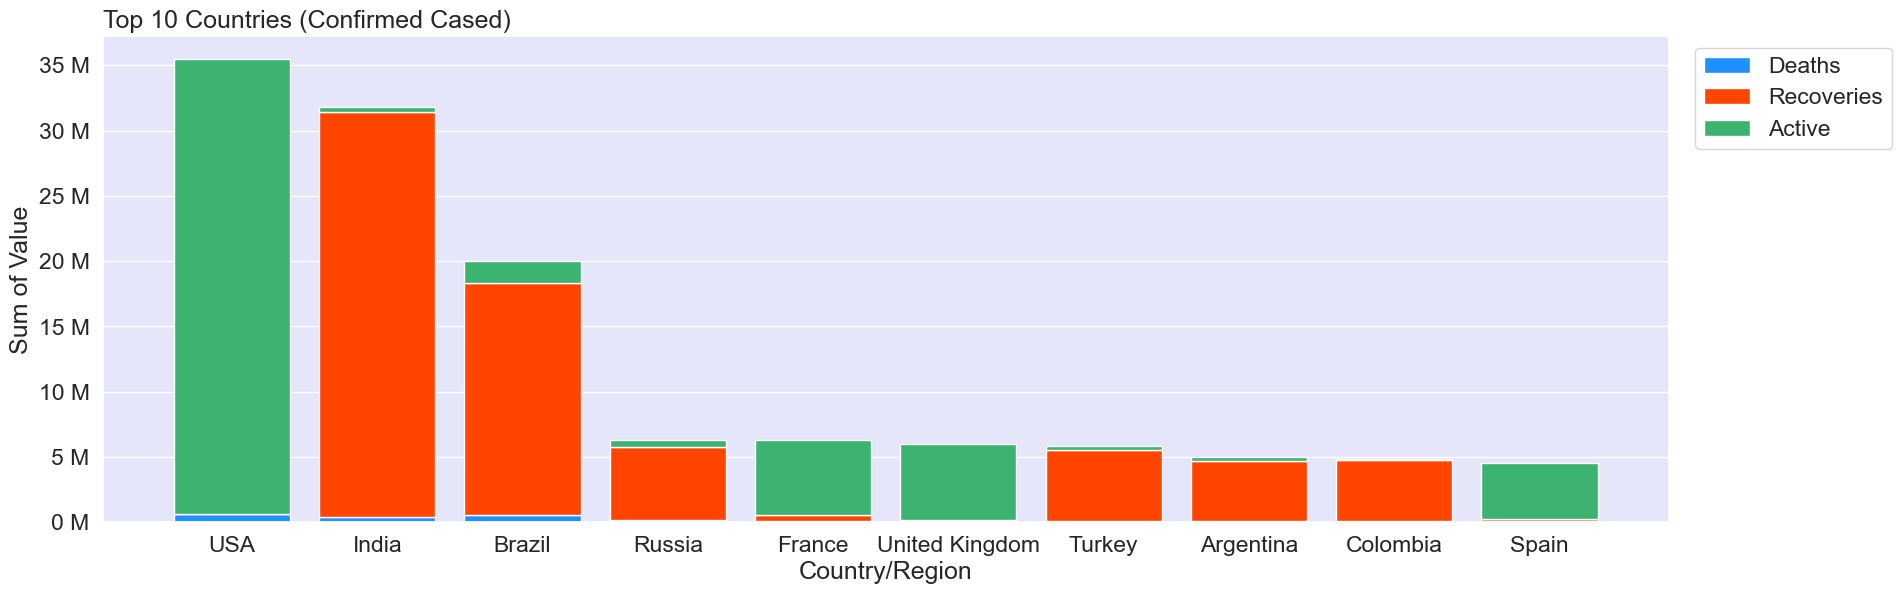

In [269]:
#Nhập mã lập trình của bạn tại đây:

plt.figure(figsize=(18, 6),facecolor='white')

plt.bar(top10_df['Country/Region'], top10_df['Deaths'], label='Deaths', color= 'dodgerblue')
plt.bar(top10_df['Country/Region'], top10_df['Recoveries'], bottom=top10_df['Deaths'], label='Recoveries', color='orangered')
plt.bar(top10_df['Country/Region'], top10_df['Active'], bottom=top10_df['Deaths']+top10_df['Recoveries'], label='Active',color='mediumseagreen')

plt.xlabel('Country/Region')
plt.ylabel('Sum of Value')
plt.title('Top 10 Countries (Confirmed Cased)',loc='left')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1),facecolor='white')
plt.grid(False)
plt.grid(axis='y', color='white') 
# Định dạng trục Y
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f} M'.format(x / 1e6))
plt.gca().yaxis.set_major_formatter(formatter)
#màu nền xung quanh
plt.gca().set_facecolor('lavender')
# Show the chart
plt.show()

# 7. Phân tích nâng cao
 

# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

Dịch Covid 2019 trên thế giới đã đạt đỉnh số ca nhiễm trong 1 ngày là 1,495 triệu người vào ngày 10/12/2020 (vào ngày có index-323 tính từ ngày 22/1/2020  index-0)

# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


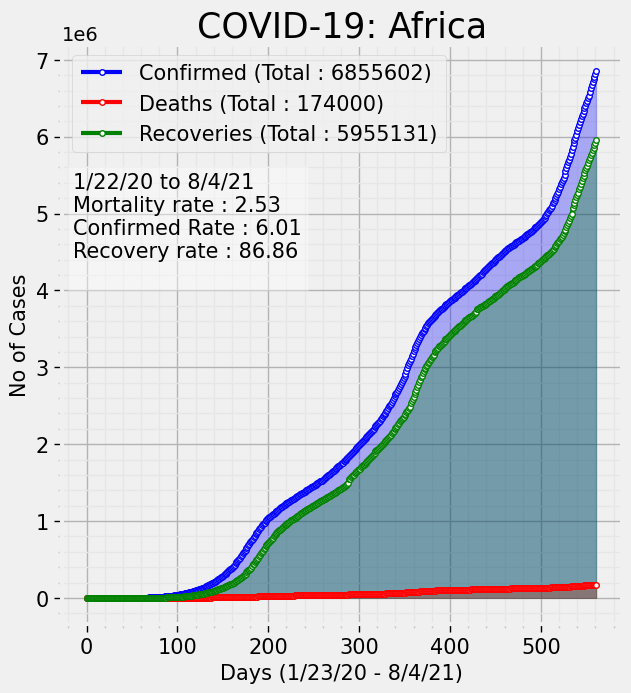

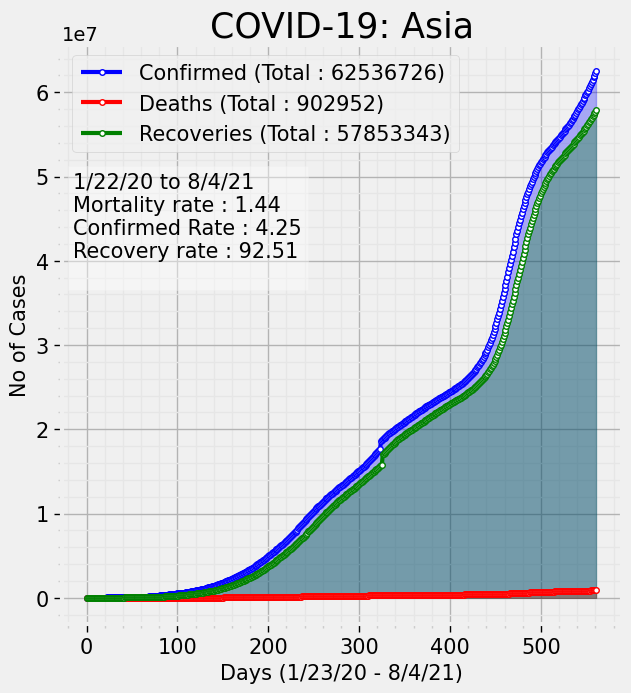

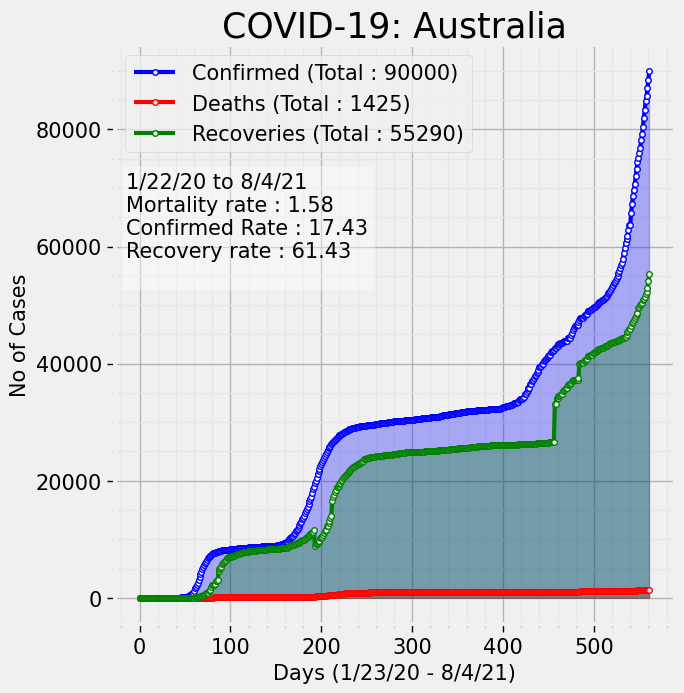

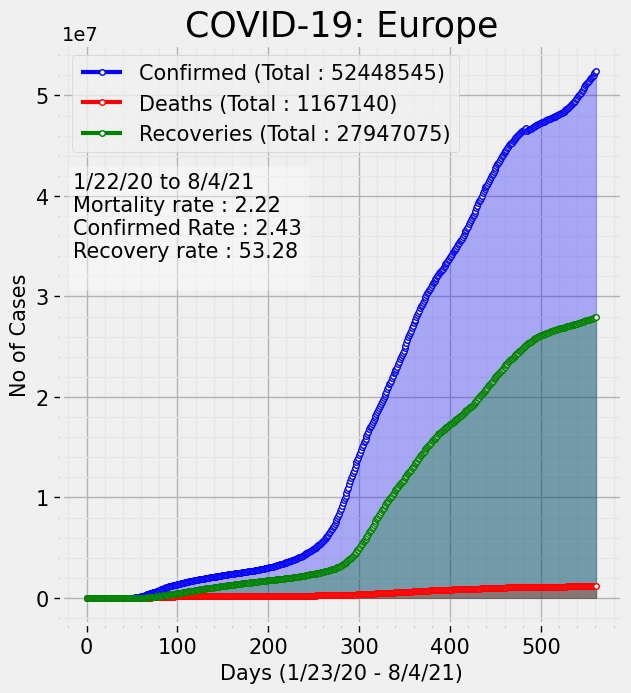

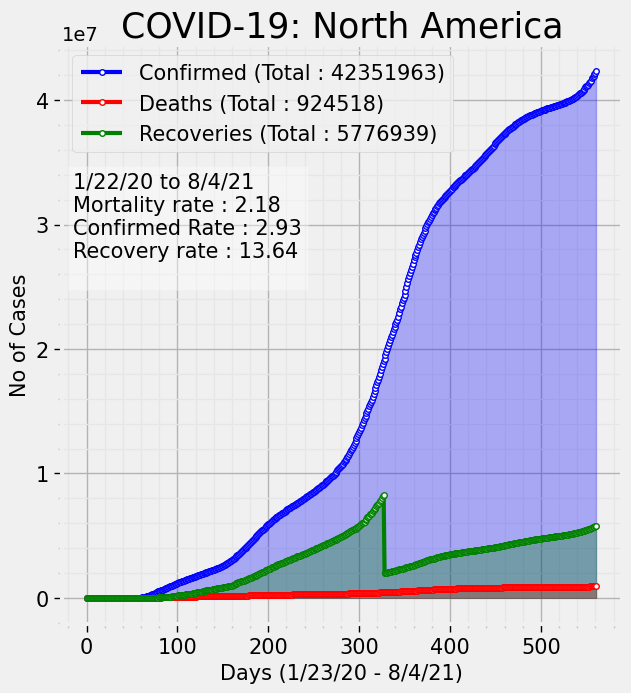

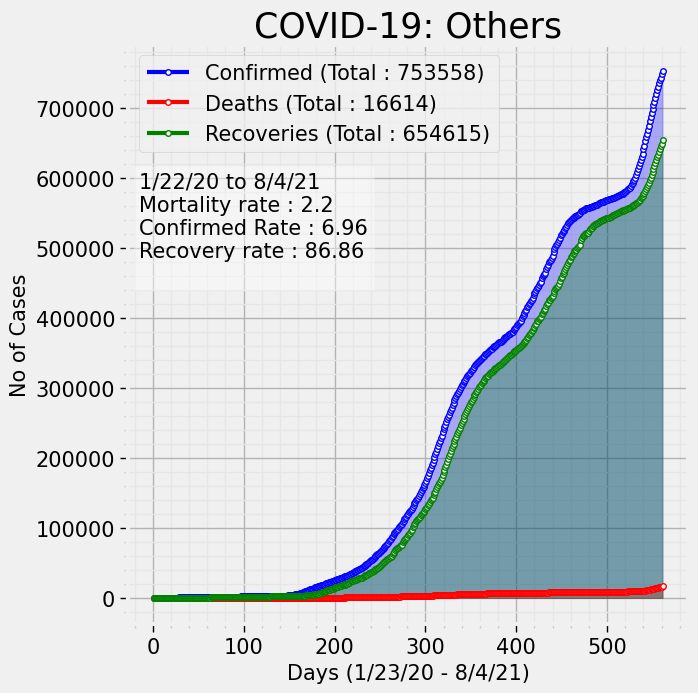

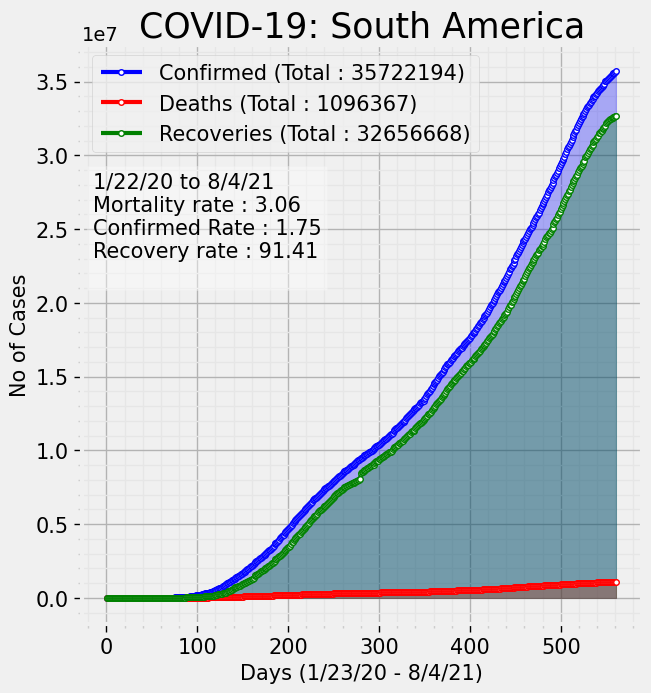

In [208]:
def visualize_covid_cases3(confirmed, deaths,recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths","Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Confirmed Rate : " + str(int(((Total_confirmed[-1] - Total_confirmed[-11])/Total_confirmed[-12])*10000)/100)+"\n"
    text += "Recovery rate : "+ str(int(Total_recoveries[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
# show biểu đồ
for item in Continental_df.index:
    visualize_covid_cases3(new_confirmed,new_deaths,new_recoveries, continent=item ,scale = "linear")

In [ ]:
# 19.1 Qua biểu đồ trên, ta có đáp án: 
      "South America"

In [ ]:
#19.2 Qua biểu đồ trên, ta có đáp án:
       "Australia"

In [ ]:
#19.3 Qua biểu đồ trên, ta có đáp án:
       "Asia"

# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

In [225]:
country3_df=country_df.copy()

In [226]:
#20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?
print('Quốc gia có tỷ lệ tử vong cao nhất:',country3_df['Mortality Rate'].idxmax())

Quốc gia có tỷ lệ tử vong cao nhất: Vanuatu


In [245]:
#20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
a= new_confirmed.groupby('Country/Region').sum()
spread_rate=[]
for i in range(len(a)):
    spread_rate.append((a.iloc[i,-1]-a.iloc[i,-11])/a.iloc[i,-12])
a['spread_rate']= spread_rate
print('Quốc gia có tỷ lệ lan truyền Covid 19 cao nhất:',a['spread_rate'].idxmax())

Quốc gia có tỷ lệ lan truyền Covid 19 cao nhất: Summer Olympics 2020


C:\Users\DUNG LO\AppData\Local\Temp\ipykernel_16096\3695762256.py:5: RuntimeWarning:

invalid value encountered in longlong_scalars



In [229]:
#20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
country3_df['Recovery rate']=country3_df['Recoveries']/country3_df['Confirmed']
country3_df['Recovery rate'].idxmax()

'Holy See'

# Bài toán 21
**Tập dữ liệu USA**

In [202]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [254]:
us_medical_data.columns
new_data=pd.DataFrame(us_medical_data[['Province_State','Country_Region','Confirmed','Deaths','Recovered','Active','Mortality_Rate']])

In [204]:
#Nhập mã lập trình của bạn tại đây:
## 21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
new_data['Death rate'] = new_data['Deaths']/new_data['Confirmed']
new_data['Province_State'].loc[new_data['Death rate'].idxmax()]

'Connecticut'

In [205]:
## 21.2 Tiểu bang nào có tỷ lan truyền cao nhất trong tập dữ liệu của các tiểu bang?
new_data['Province_State'].loc[new_data['Mortality_Rate'].idxmax()]

'Connecticut'

In [206]:
## 21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?
new_data['Recovery rate'] = new_data['Recovered']/new_data['Confirmed']
new_data['Province_State'].loc[new_data['Recovery rate'].idxmax()]

'Minnesota'

# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp được xác nhận mới trong 10 bang hàng đầu có số ca xác nhận dương tính cao nhất ở Hoa Kỳ.

Text(0.5, 1.0, 'The Relationship Between Confirmed And Tested of The Top 10 States')

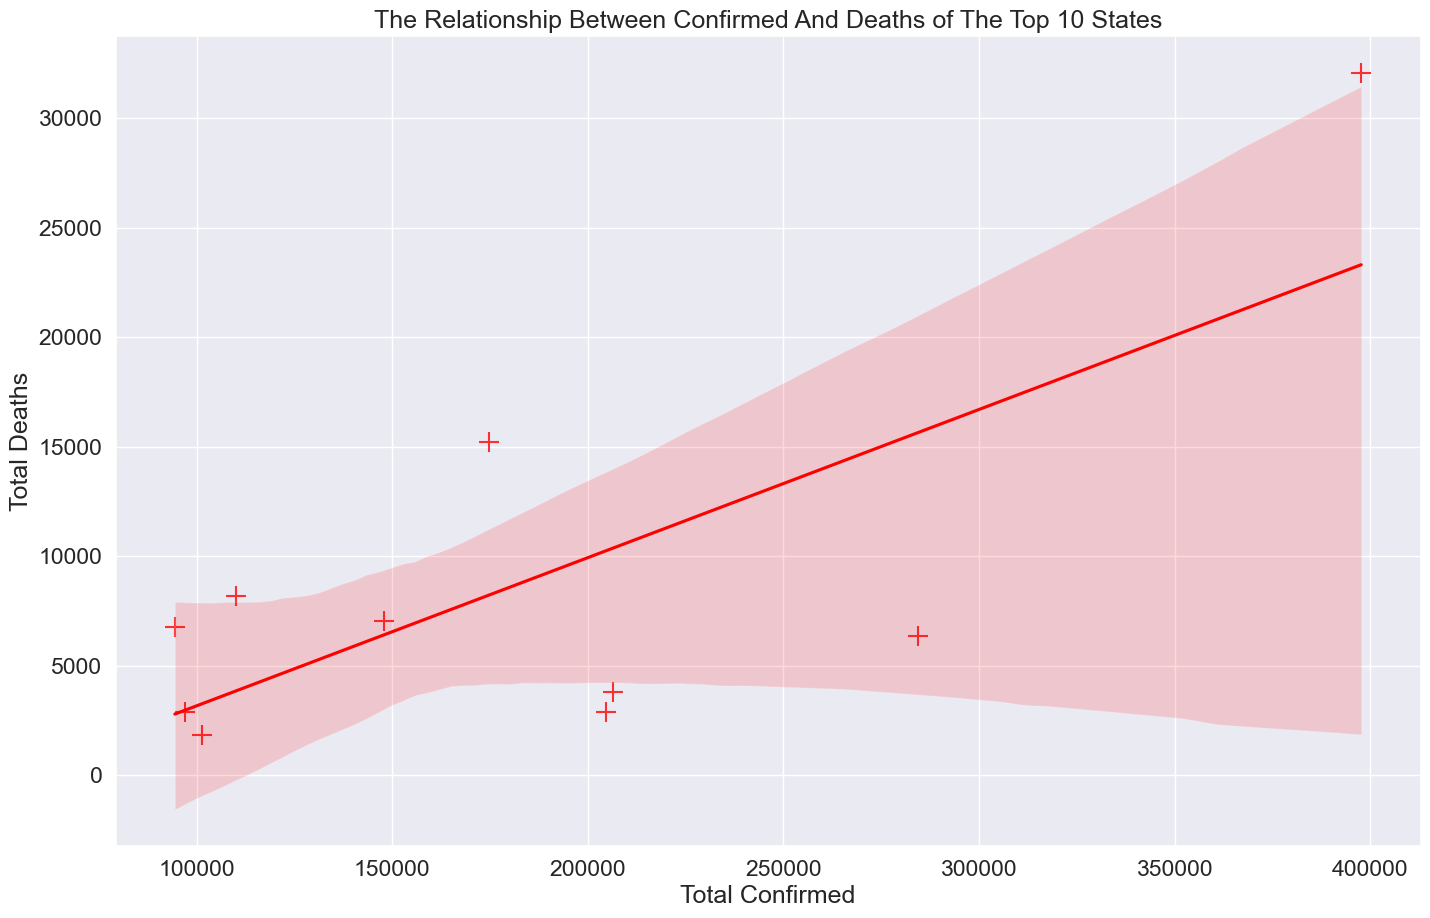

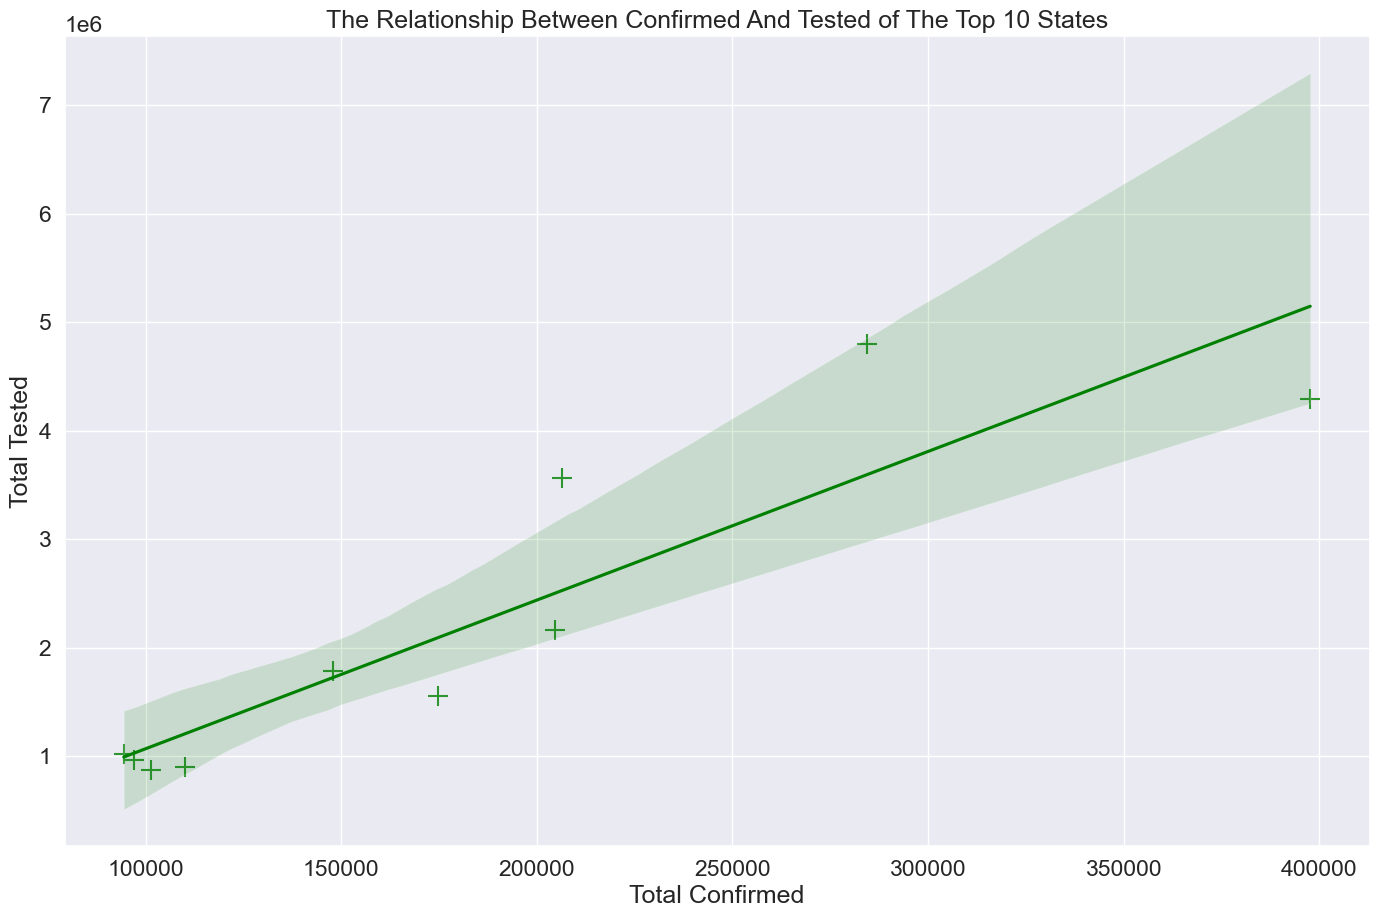

In [257]:
#Nhập mã lập trình của bạn tại đây:
top10_US = us_medical_data.sort_values('Confirmed', ascending=False).head(10)

#Mô hình hồi quy: thể hiện mối quan hệ giữa số ca nhiễm và số người chết của 10 bang hàng đầu
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='Confirmed', y='Deaths', data=top10_US, color='red',marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Total Confirmed', ylabel='Total Deaths')
ax.set_title('The Relationship Between Confirmed And Deaths of The Top 10 States')
#Mô hình hồi quy: thể hiện mối quan hệ giữa số ca nhiễm và số người test của 10 bang hàng đầu
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='Confirmed', y='People_Tested', data=top10_US, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Total Confirmed', ylabel='Total Tested')
ax.set_title('The Relationship Between Confirmed And Tested of The Top 10 States')